In [1]:
import scanpy as sc
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import mmread
from scipy.sparse import csr_matrix
import pandas as pd
import rpy2
sc.settings.set_figure_params(dpi=80, facecolor="white")
sc.logging.print_header()

import warnings

# Ignore the specific FutureWarning
warnings.filterwarnings("ignore")

/Users/shashankkatiyar/new_miniforge_mamba/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==1.5.3 scikit-learn==1.4.0 statsmodels==0.14.1 igraph==0.11.4 pynndescent==0.5.11


In [2]:
# read the filtered feature matrices and make adata_list
adata_ret1 = sc.read_10x_h5('Ret_1/filtered_feature_bc_matrix.h5')
adata_ret2 = sc.read_10x_h5('Ret_2/filtered_feature_bc_matrix.h5')
adata_ret3 = sc.read_10x_h5('Ret_3/filtered_feature_bc_matrix.h5')
adata_ret4 = sc.read_10x_h5('Ret_4/filtered_feature_bc_matrix.h5')
adata_rpe1 = sc.read_10x_h5('RPE_1/filtered_feature_bc_matrix.h5')
adata_rpe2 = sc.read_10x_h5('RPE_2/filtered_feature_bc_matrix.h5')
adata_rpe3 = sc.read_10x_h5('RPE_3/filtered_feature_bc_matrix.h5')
adata_ret_student = sc.read_10x_h5('Ret_Student/filtered_feature_bc_matrix.h5')
adata_undet = sc.read_10x_h5('Undetermined_eye/filtered_feature_bc_matrix.h5')

# make list of adata objects
adata_list = [adata_ret1, adata_ret2, adata_ret3, adata_ret4, adata_rpe1, adata_rpe2, adata_rpe3, adata_ret_student, adata_undet]
# make list of identifiers for each adata object
adata_id = ['Ret_1', 'Ret_2', 'Ret_3', 'Ret_4', 'RPE_1', 'RPE_2', 'RPE_3', 'Ret_Student', 'Undetermined_eye']

In [3]:
# saving soupx_groups for each adata in appropriate directory
# doublet detection steps1 (some preprocessing on the adatas to get soupx_groups (basically clusters)
# for all of them and use those to better estimate the amount of ambient RNA in each of the cells)

for itr, adata in enumerate(adata_list):
    # make a copy of the adata we are dealing with
    adata_pp = adata.copy()
    # do cell-level normalization on this copied adata object
    sc.pp.normalize_per_cell(adata_pp)
    # do log1p transformation of the expression values
    sc.pp.log1p(adata_pp)

    # compute PCA for this adata
    sc.pp.pca(adata_pp)
    sc.pp.neighbors(adata_pp)
    sc.tl.leiden(adata_pp, key_added='soupx_groups')
    # save into soupx_groups variable
    soupx_groups = adata_pp.obs["soupx_groups"]

    # save this variable in an R-readable format in the appropriate directory
    soupx_groups.to_csv(adata_id[itr] + '/soupx_groups.csv', header=True, index=True)

In [4]:
soupx_groups

[AAACCCAAGTATGTAG-1     0
 AAACGAACAACAGCTT-1     3
 AAACGAACAACTGATC-1     0
 AAACGAACAGAACCGA-1     4
 AAACGAATCGCCACTT-1     4
                       ..
 TTTGGAGGTCACTAGT-1     7
 TTTGGTTAGTCCGCCA-1     0
 TTTGGTTCATAAGCGG-1    15
 TTTGGTTCATTCGGGC-1    12
 TTTGGTTTCATTCACT-1     2
 Name: soupx_groups, Length: 3304, dtype: category
 Categories (21, object): ['0', '1', '2', '3', ..., '17', '18', '19', '20'],
 AAACCCAAGAGTTGCG-1    2
 AAACCCAAGGAAGAAC-1    3
 AAACCCAAGTTCATCG-1    3
 AAACCCACAAACTAGA-1    0
 AAACCCACAATTGCTG-1    0
                      ..
 TTTGTTGCATCGGAGA-1    0
 TTTGTTGGTTGTTTGG-1    2
 TTTGTTGTCATACGAC-1    3
 TTTGTTGTCCACGTCT-1    2
 TTTGTTGTCCTATGGA-1    9
 Name: soupx_groups, Length: 5318, dtype: category
 Categories (21, object): ['0', '1', '2', '3', ..., '17', '18', '19', '20'],
 AAACCCAAGATTGACA-1     1
 AAACCCAAGATTGCGG-1     2
 AAACCCACACAACGCC-1    11
 AAACCCACACGGTAGA-1     3
 AAACCCACACTGTCGG-1     5
                       ..
 TTTGTTGGTACAGTAA-1     7
 

In [ ]:
# bringing back the processed files' doublet variables (and also ambient RNA variables, whatever they are)

# will do something like making the R script in such a way that an input can be passed to it, and from here,
# will supply the input file/folder and then extract the variables from the appropriate directory.

At this point, need to go to R, and do further qc (doublet detection and ambient RNA detection) on the adata files. Basically run the corresponding R file, which will produce correctly named output files. Once that is done, then proceed below. 

In [381]:
%load_ext rpy2.ipython

In [382]:
%%R
library(Seurat)


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Loading required package: SeuratObject
Loading required package: sp
‘SeuratObject’ was built with package ‘Matrix’ 1.6.3 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Attaching package: ‘SeuratObject’

The following object is masked from ‘package:base’:

    intersect

In addition: Warning messages:
1: package ‘Seurat’ was built under R version 4.2.3 
2: package ‘SeuratObject’ was built under R version 4.2.3 
3: package ‘sp’ was built under R version 4.2.3 


In [306]:
# take in the ambient_RNA_corrected_X.mtx, doublet_scores.csv and doublet_classes.csv files for each 
# adata and add to the corresponding adatas

# CURRENTLY ONLY DOING FOR THE RET_1 ADATA

# setting up adata (this is temp, as later needs to be looped through all adatas)
adata = adata_ret1

# reading in the input files
out = csr_matrix(mmread("Ret_1/ambient_RNA_corrected_X.mtx"))
doublet_scores_df = pd.read_csv('Ret_1/doublet_scores.csv')
doublet_scores = list(doublet_scores_df['x'])
doublet_classes_df = pd.read_csv('Ret_1/doublet_classes.csv')
doublet_classes = list(doublet_classes_df['x'])

# applying the ambient rna corrected expression values on adata
adata.layers["counts"] = adata.X
adata.layers["soupX_counts"] = out.T
adata.X = adata.layers["soupX_counts"]

# adding the doublet information on the adata object
adata.obs["scDblFinder_score"] = doublet_scores
adata.obs["scDblFinder_class"] = doublet_classes
adata.obs.scDblFinder_class.value_counts()

singlet    3060
doublet     244
Name: scDblFinder_class, dtype: int64

In [309]:
# make var names unique for each adata
for adata in adata_list:
    adata.var_names_make_unique()

# create mt, ribo and hb gene lists for each adata
for adata in adata_list:
    adata.var['mt'] = adata.var_names.str.startswith('mt-')
    adata.var['ribo'] = adata.var_names.str.startswith(('Mrps', 'Mrpl'))
    adata.var['hb'] = adata.var_names.str.startswith(('Hbb', 'Hba'))

# perform basic quality control on all the adata objects
for adata in adata_list:
    adata.var_names_make_unique()
    sc.pp.calculate_qc_metrics(adata, inplace=True, qc_vars=['mt', 'ribo', 'hb'])
    sc.pp.filter_cells(adata, min_genes=200)
    sc.pp.filter_genes(adata, min_cells=3)

In [310]:
# adata I am working with
adata = adata_ret1.copy()

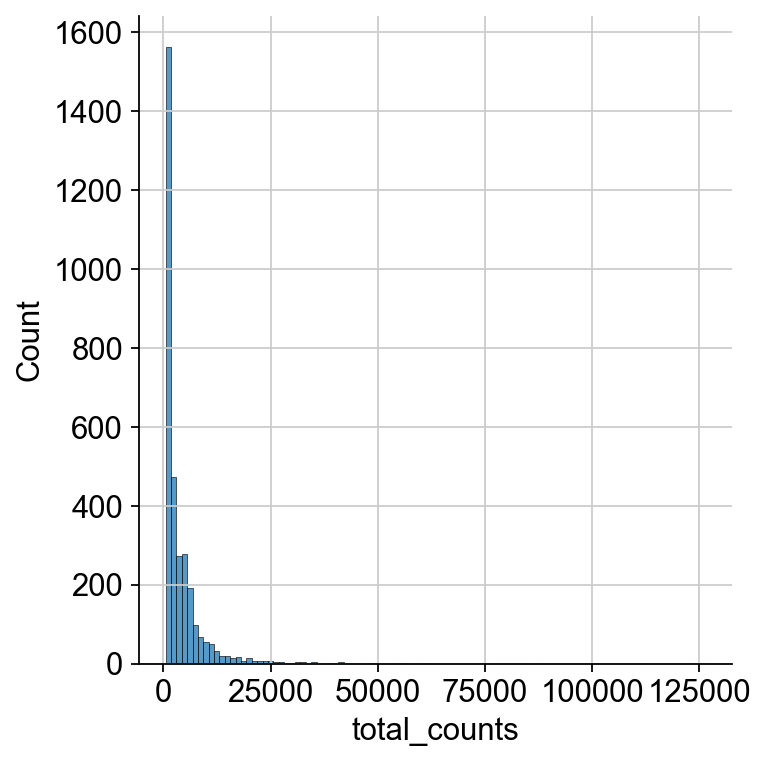

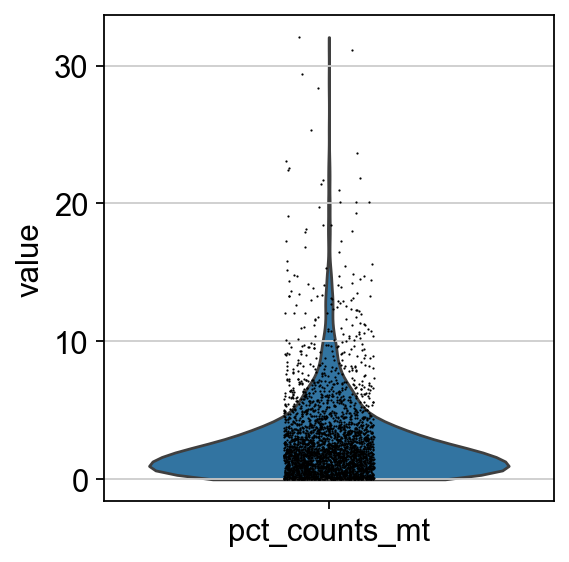

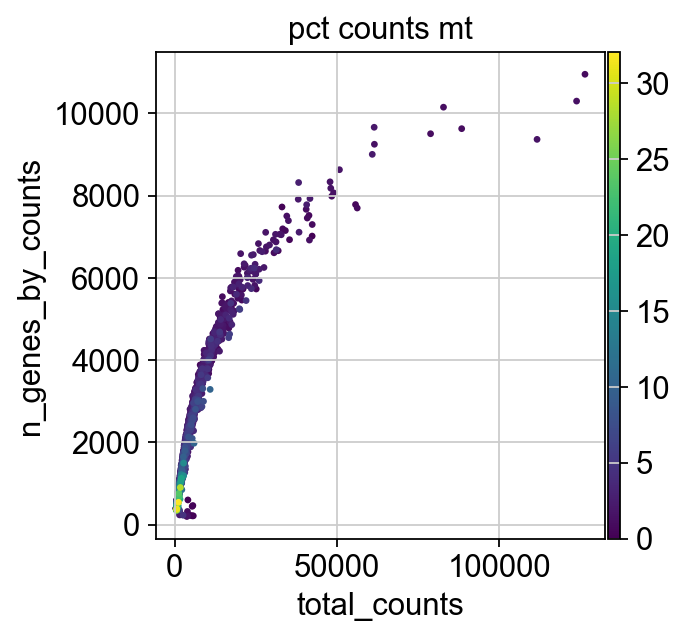

In [312]:
# quality-indicating plots for mitochondrial genes in samples
p1 = sns.displot(adata.obs["total_counts"], bins=100, kde=False)
p2 = sc.pl.violin(adata, "pct_counts_mt")
p3 = sc.pl.scatter(adata, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

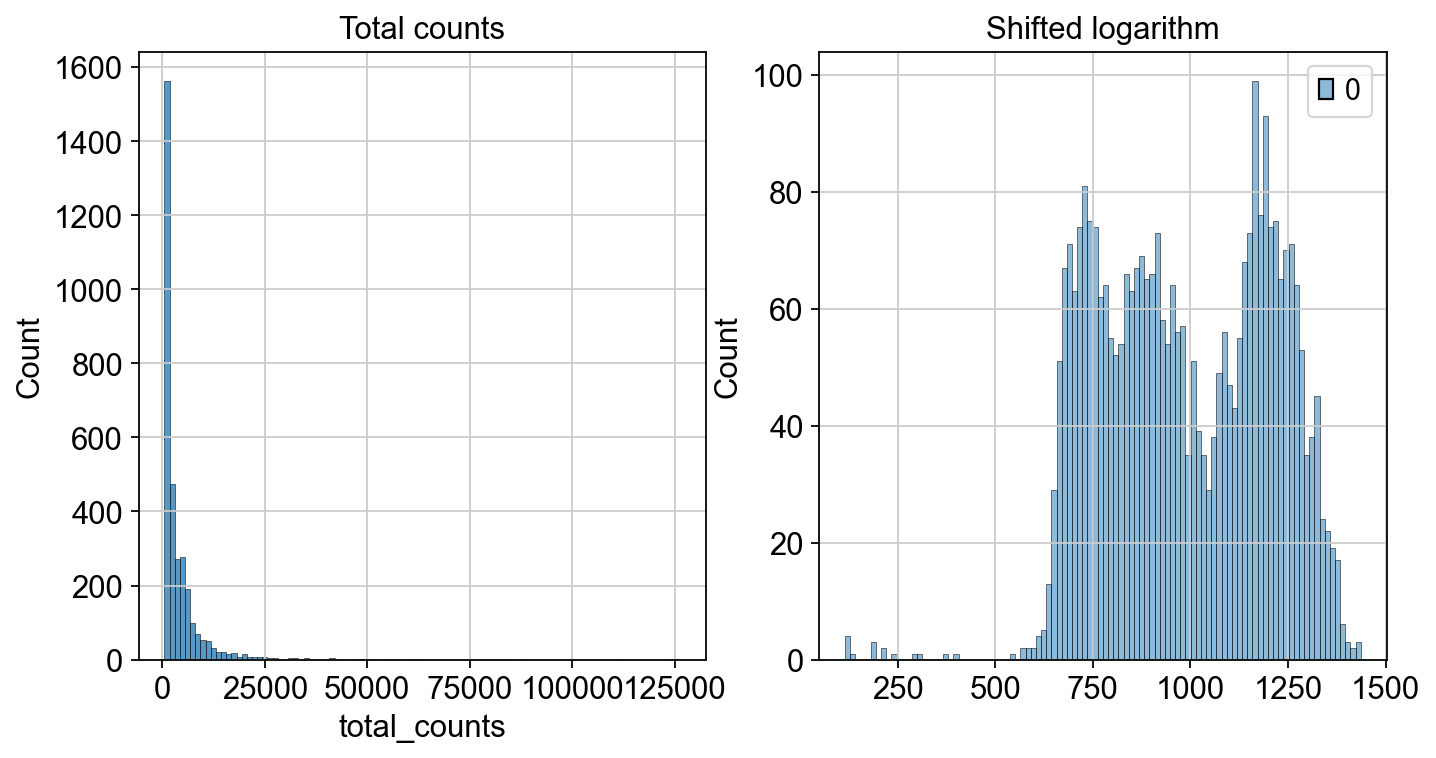

In [313]:
# Performing shifted logarithm normalization

# take backup of counts in .layers["counts"], as gonna change it to the normalized values now
adata.layers["counts"] = adata.X
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)
adata.X = adata.layers["log1p_norm"]

# plot the difference in total counts for observations post normalization
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["total_counts"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [315]:
# performing leiden clustering

# calculate knn graph using dimension reduced data into top 30 PCs
sc.pp.neighbors(adata, n_pcs=30)
# embed the cells into a UMAP embedding for visualization
sc.tl.umap(adata)
# perform leiden clustering with resolution 1.0 (and save in correspondingly named key)
sc.tl.leiden(adata, key_added="leiden_res1", resolution=1.0)

sc.tl.leiden(adata, key_added="leiden_res0_25", resolution=0.25)
sc.tl.leiden(adata, key_added="leiden_res0_5", resolution=0.5)

         Falling back to preprocessing with `sc.pp.pca` and default params.


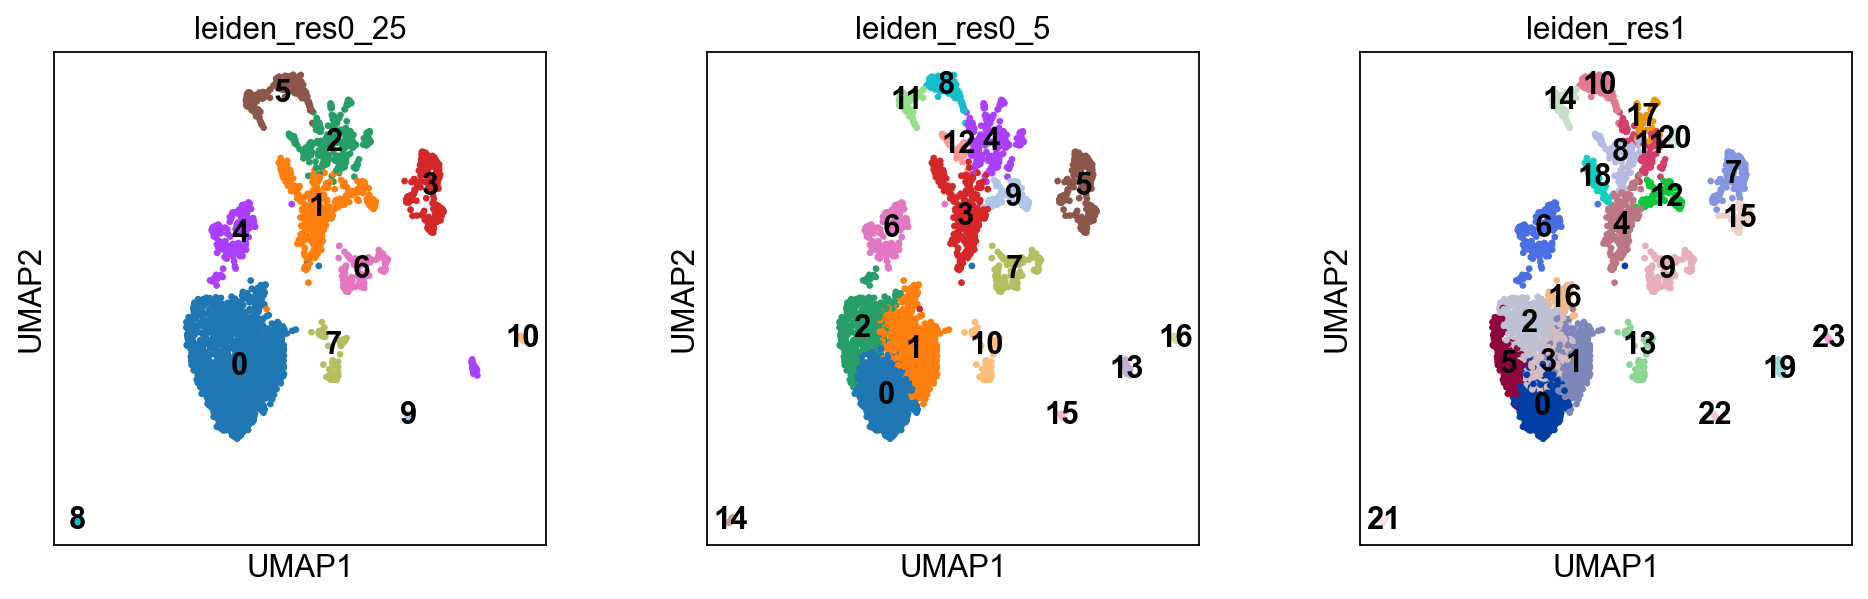

In [316]:
# plot the results post clustering
# this plotting is by using all the genes. Below is one in which we only use highly var genes
sc.pl.umap(
    adata,
    color=["leiden_res0_25", "leiden_res0_5", "leiden_res1"],
    legend_loc="on data",
)

# NOTE: We would like to highlight again that distances between the displayed clusters must be interpreted 
# with caution. As the UMAP embedding is in 2D, distances are not necessarily captured well between all 
# points. We recommend to not interprete distances between clusters visualized on UMAP embeddings.

In [374]:
# declaring the marker genes which we already know (https://www.embopress.org/doi/full/10.15252/embj.2018100811)

marker_genes = {
    "rod photoreceptors": ["PDE6A", "Pde6a", "CNGA1", "Cnga1", "RHO", "Rho"], 
    "cone photoreceptors": ["ARR3", "Arr3", "GNGT2", "Gngt2", "GUCA1C", "Guca1c", 'Gnat2'], 
    "Müller glia": ["RLBP1", "Rlbp1", "CRALBP", "Cralbp"], 
    "retinal astrocytes": ["GFAP", "Gfap"], 
    "microglia": ["HLA-DPA1", "HLA-DPB1", "HLA-DRA", "C1qa"], # -- first 3 genes not present in mouse 
    # "bipolar cells": ["VSX2", "Vsx2", "OTX2", "Otx2"], 
    "retinal pigment epithelial cells": ['Rpe65', 'Best1'],
    "On-bipolar": ["Isl1"], # -- not present in mouse and was causing errors in downstream analysis 
    "Off-bipolar": ["Grik1"],
    "retinal ganglion cells": ["NEFL", "Nefl", "GAP43", "Gap43", "SNCG", "Sncg", "SLC17A6", "Slc17a6"], 
    "amacrine cells": ["GAD1", "Gad1", "CALB1", "Calb1", "CHAT", "Chat"], 
    "horizontal cells": ["ONECUT1", "Onecut1", "ONECUT2", "Onecut2"]
}

# only keeping those marker genes in the above dict, which are also in adata.var
marker_genes_in_data = dict()
for ct, markers in marker_genes.items():
    markers_found = list()
    for marker in markers:
        if marker in adata.var.index:
            markers_found.append(marker)
    marker_genes_in_data[ct] = markers_found

marker_genes_in_data  # lets see which ones remain

{'rod photoreceptors': ['Pde6a', 'Cnga1', 'Rho'],
 'cone photoreceptors': ['Arr3', 'Gngt2', 'Gnat2'],
 'Müller glia': ['Rlbp1'],
 'retinal astrocytes': ['Gfap'],
 'microglia': ['C1qa'],
 'retinal pigment epithelial cells': ['Rpe65'],
 'On-bipolar': ['Isl1'],
 'Off-bipolar': ['Grik1'],
 'retinal ganglion cells': ['Nefl', 'Gap43', 'Sncg', 'Slc17a6'],
 'amacrine cells': ['Gad1', 'Calb1', 'Chat'],
 'horizontal cells': ['Onecut1', 'Onecut2']}

In [375]:
# we are not doing the proper feature selection (according to best practices blog) right now, 
# just doing normal one line highly variable genes' selection
sc.pp.highly_variable_genes(adata)
# adata.var["highly_variable"] = adata.var["highly_deviant"]
sc.tl.pca(adata, n_comps=50, use_highly_variable=True)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

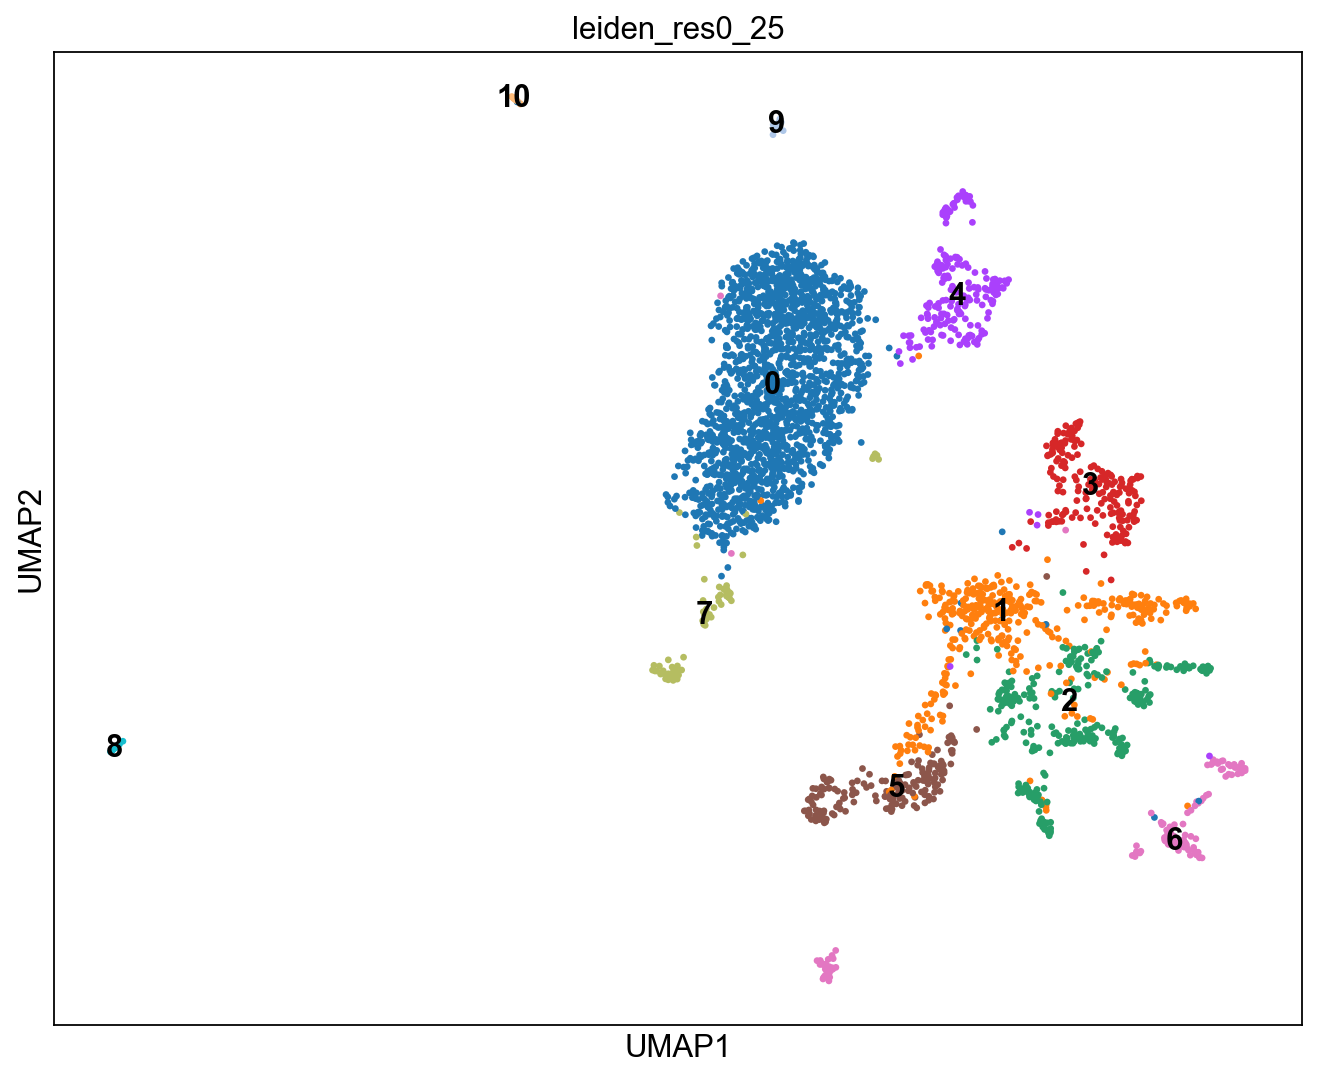

In [376]:
# rough visualization of clusters. We will do actual clustering later
sc.set_figure_params(figsize=(10, 8))  # setting the size for this fig
sc.pl.umap(adata, color='leiden_res0_25', legend_loc="on data")
# sc.set_figure_params(figsize=(5, 4)) # resetting back to default

rod photoreceptors:


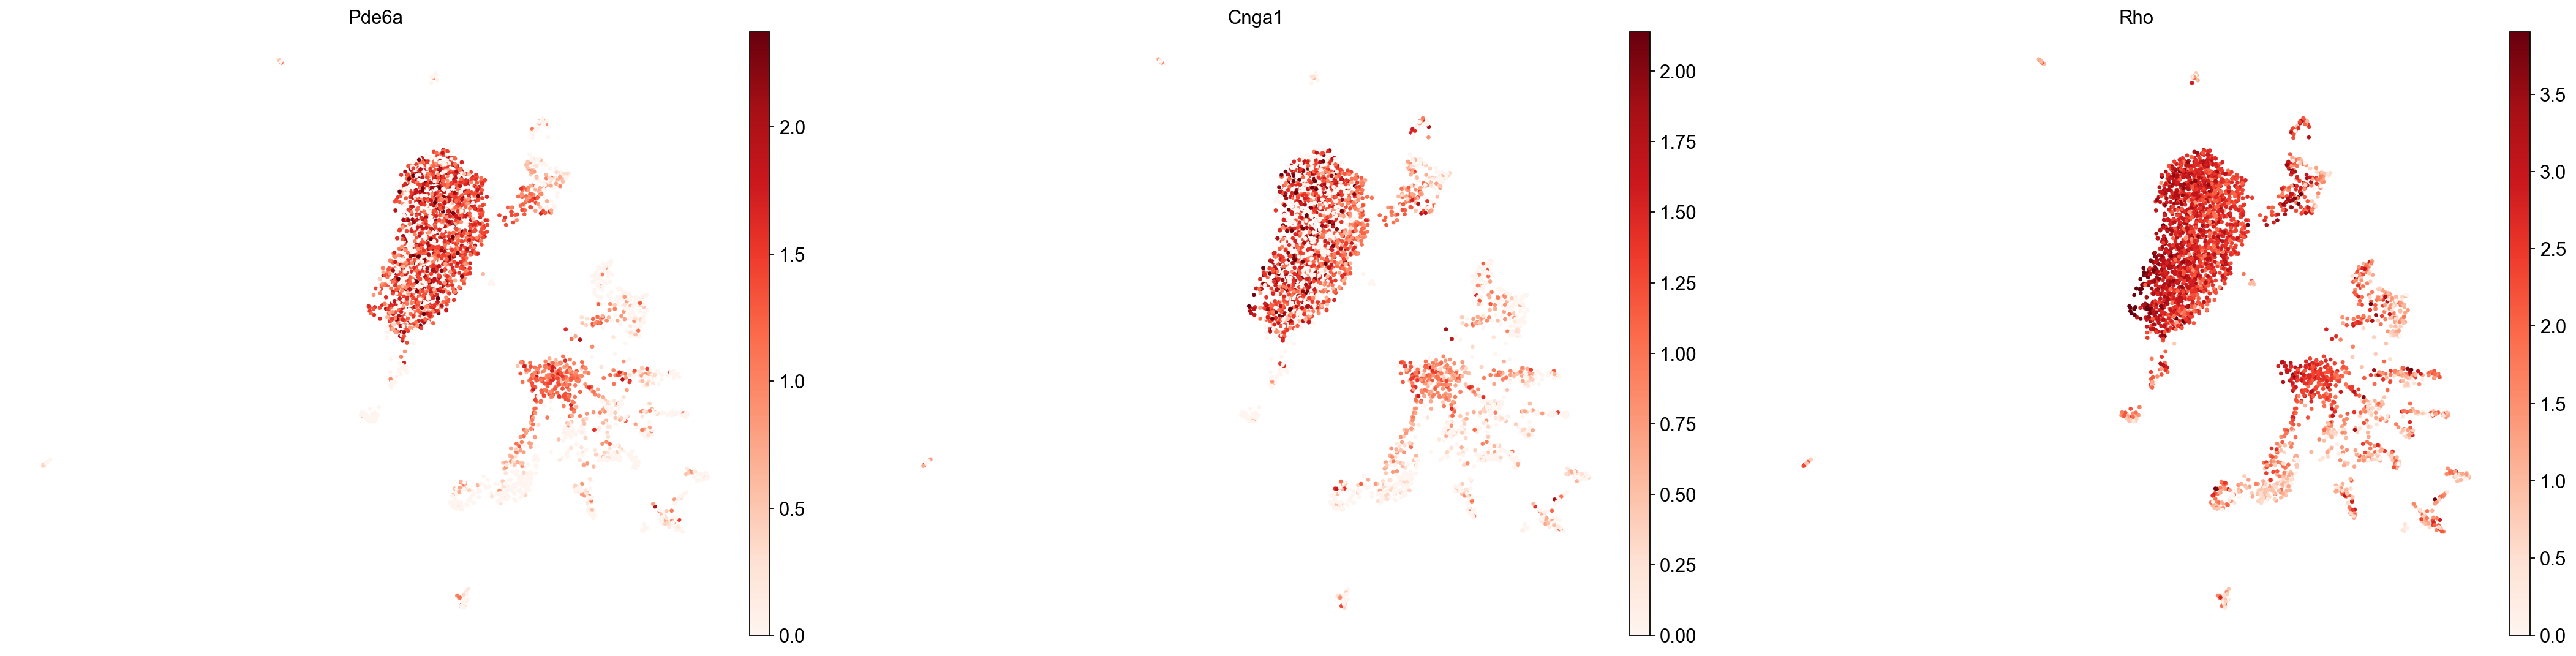




cone photoreceptors:


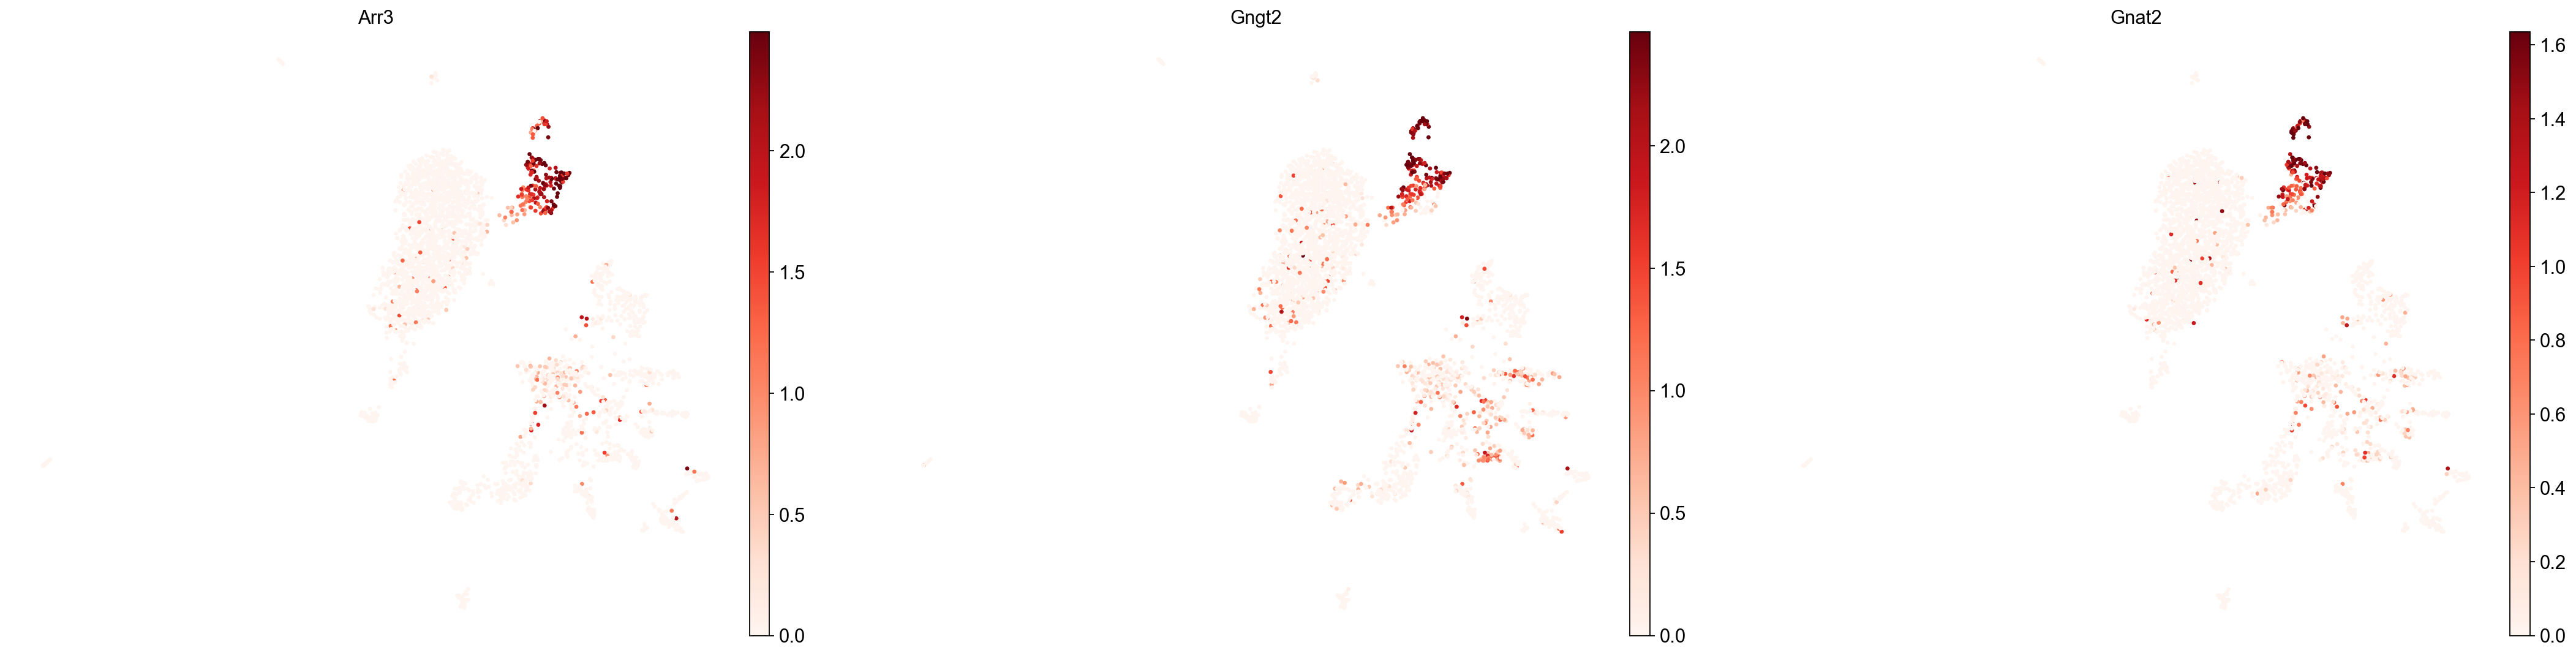




Müller glia:


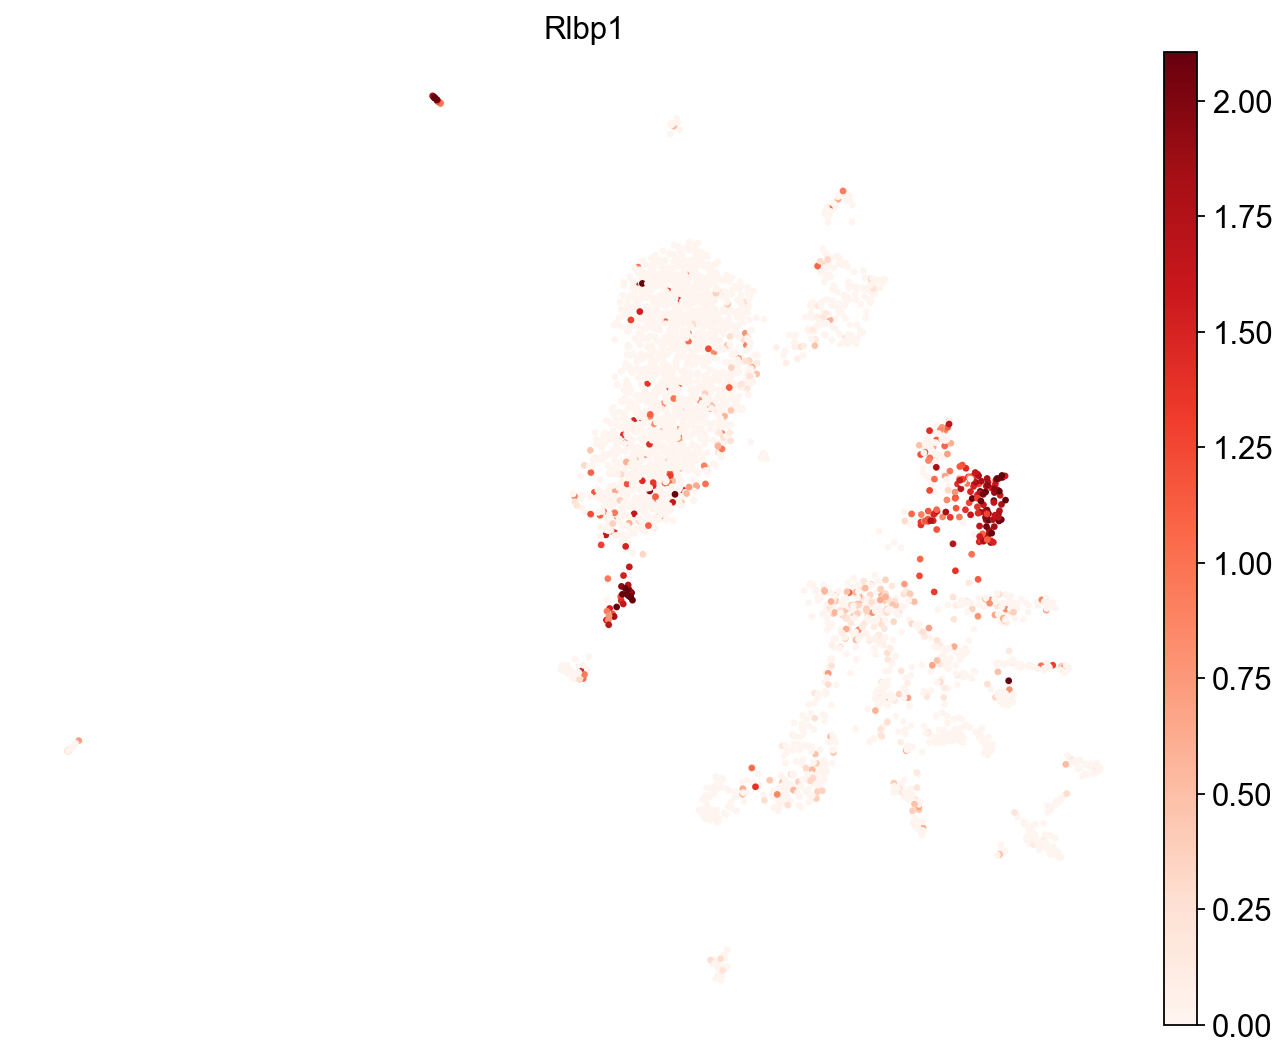




retinal astrocytes:


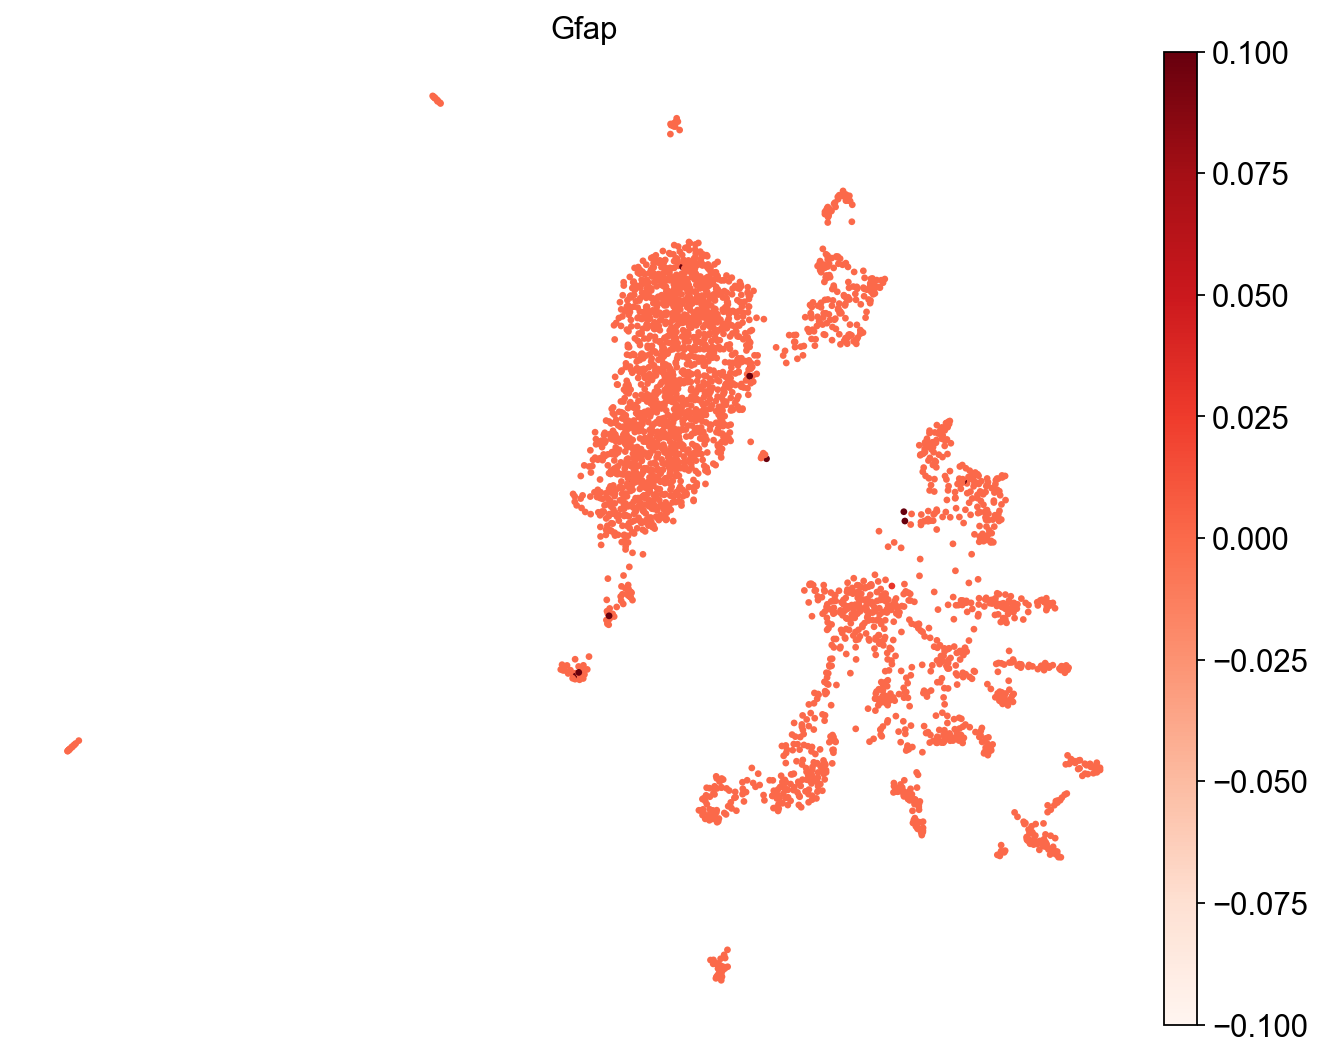




microglia:


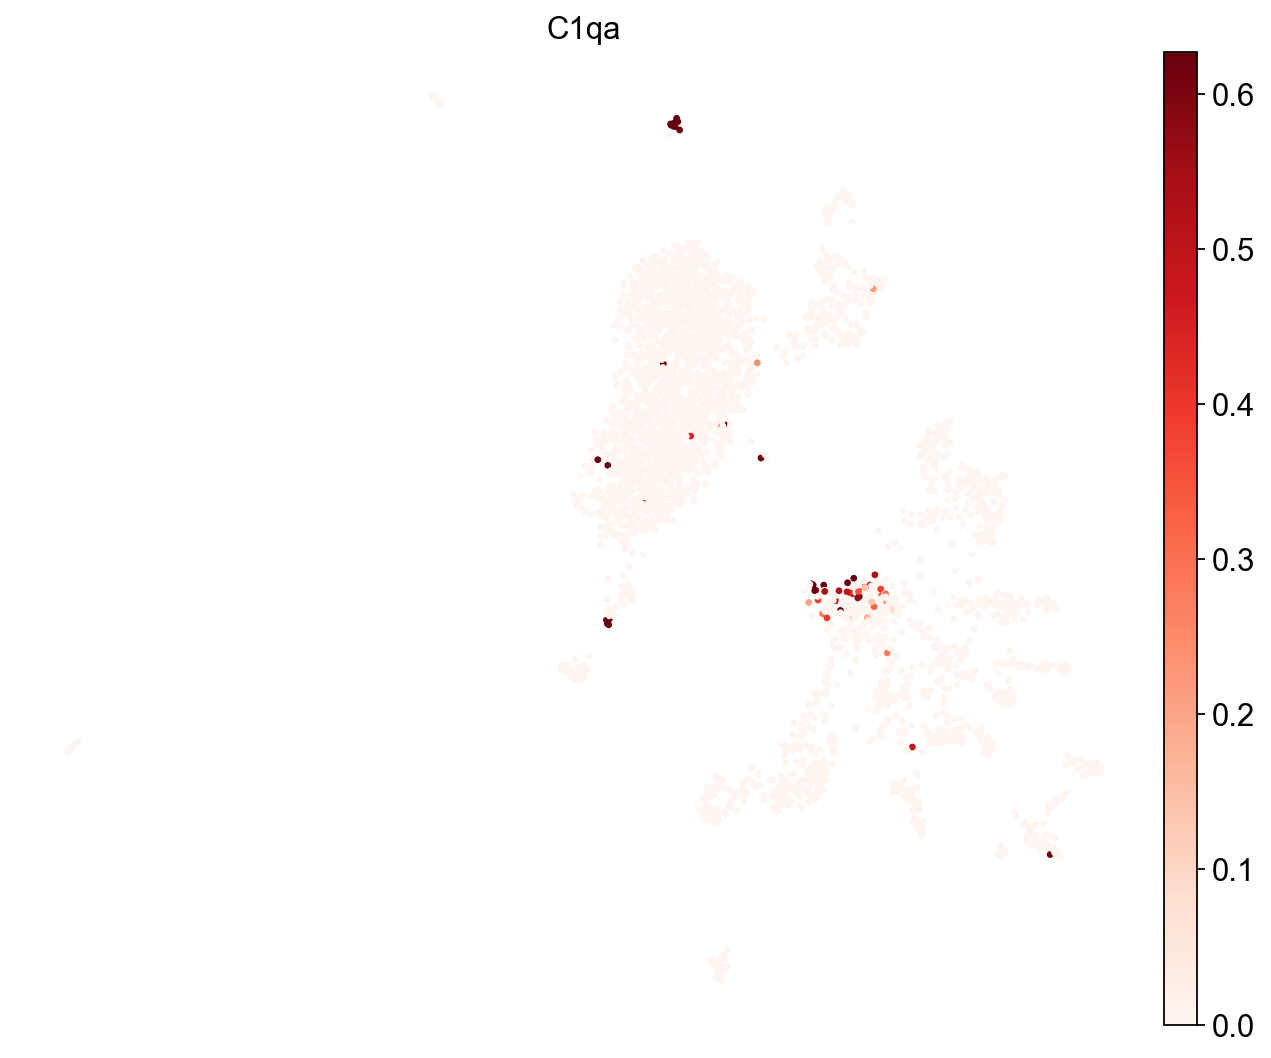




retinal pigment epithelial cells:


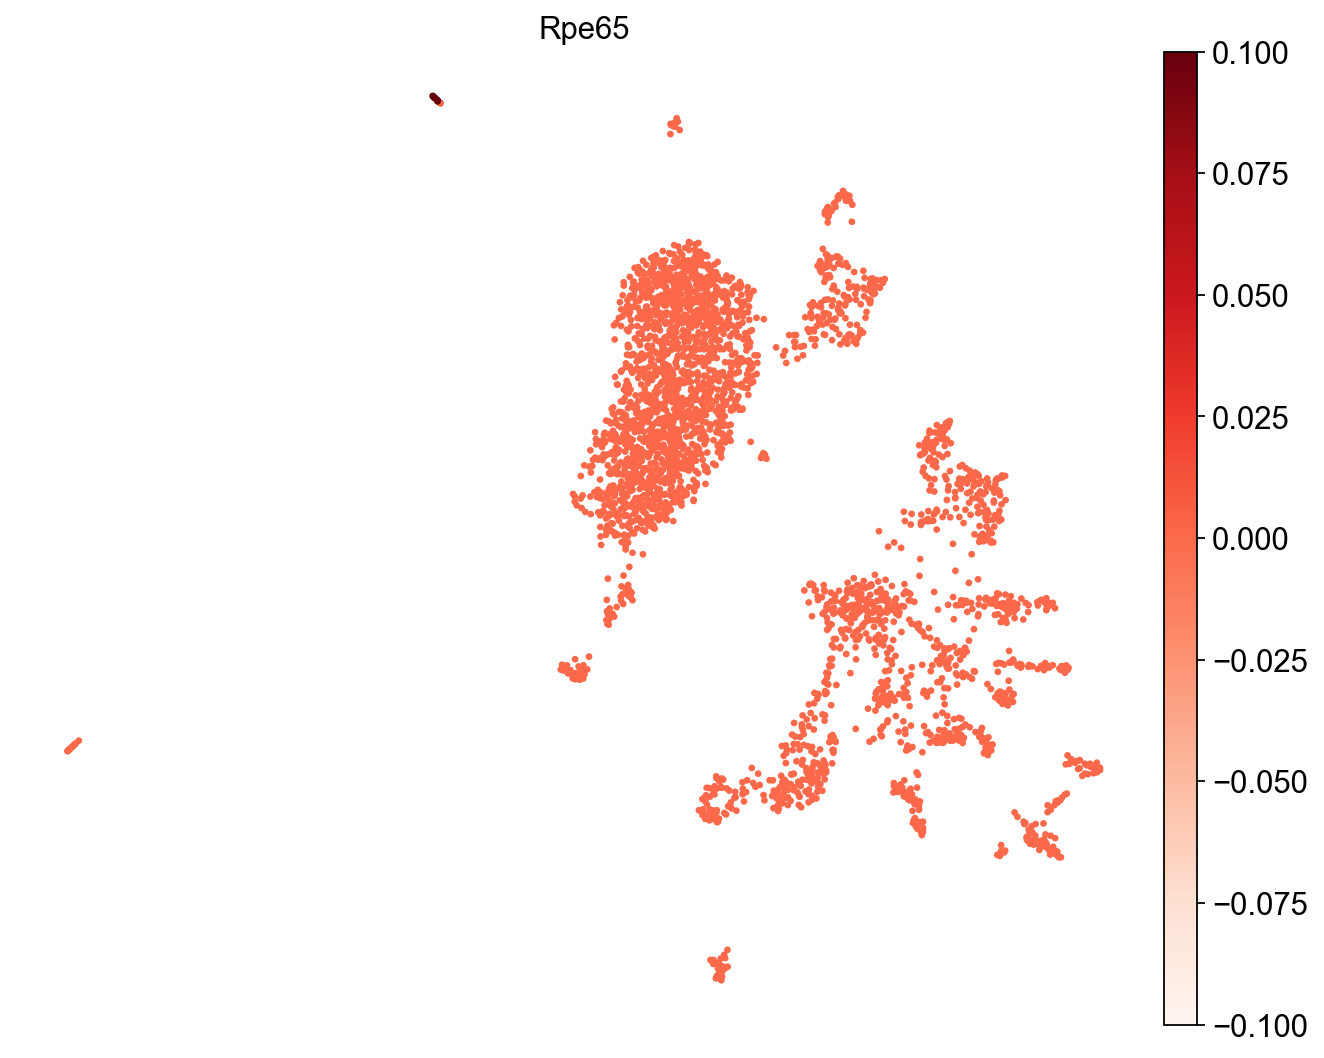




On-bipolar:


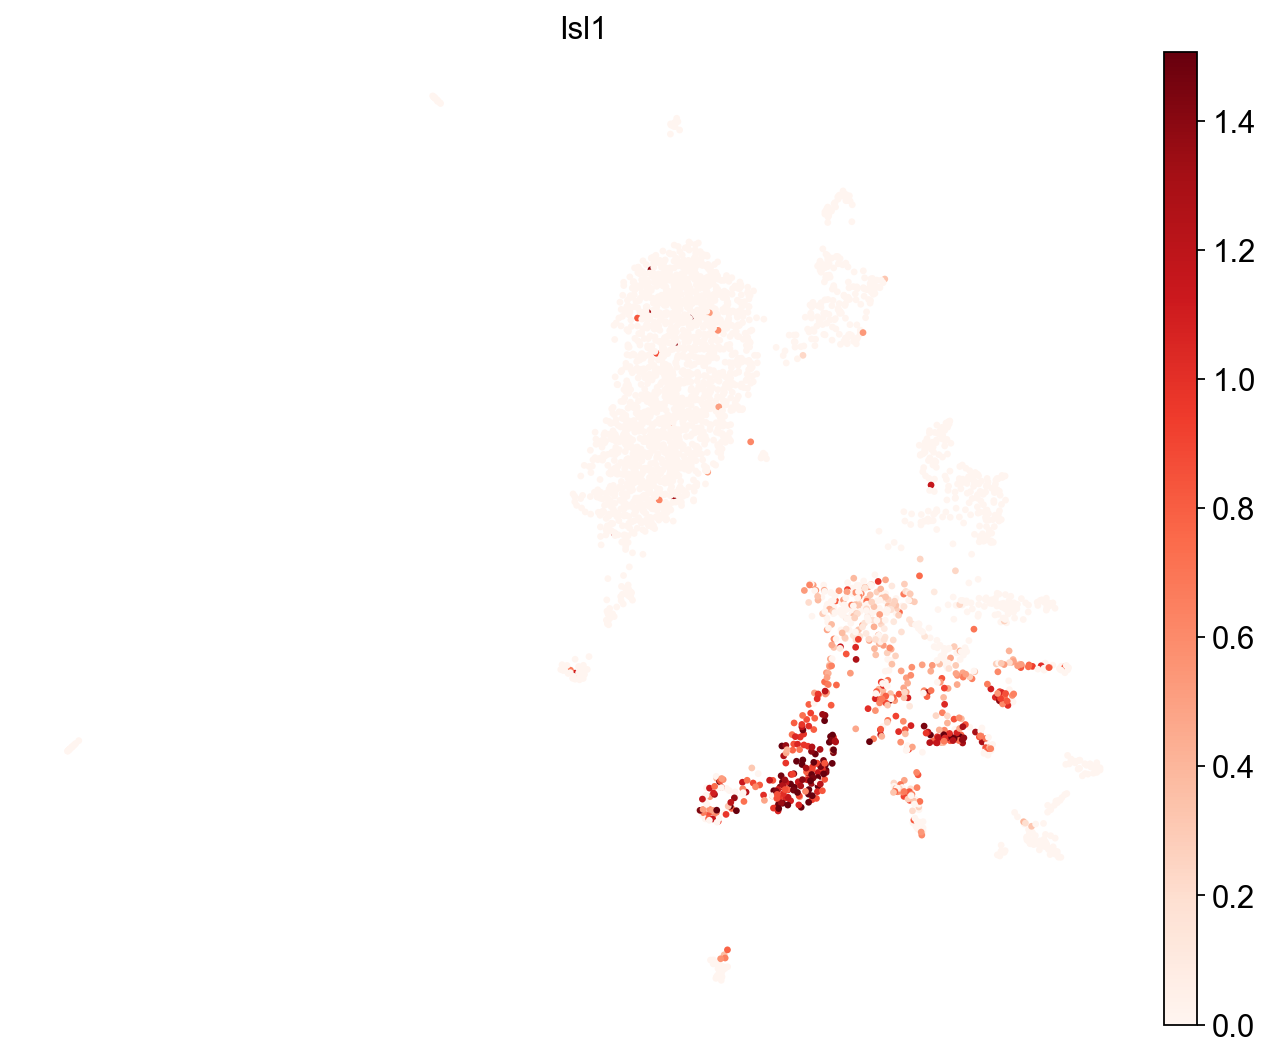




Off-bipolar:


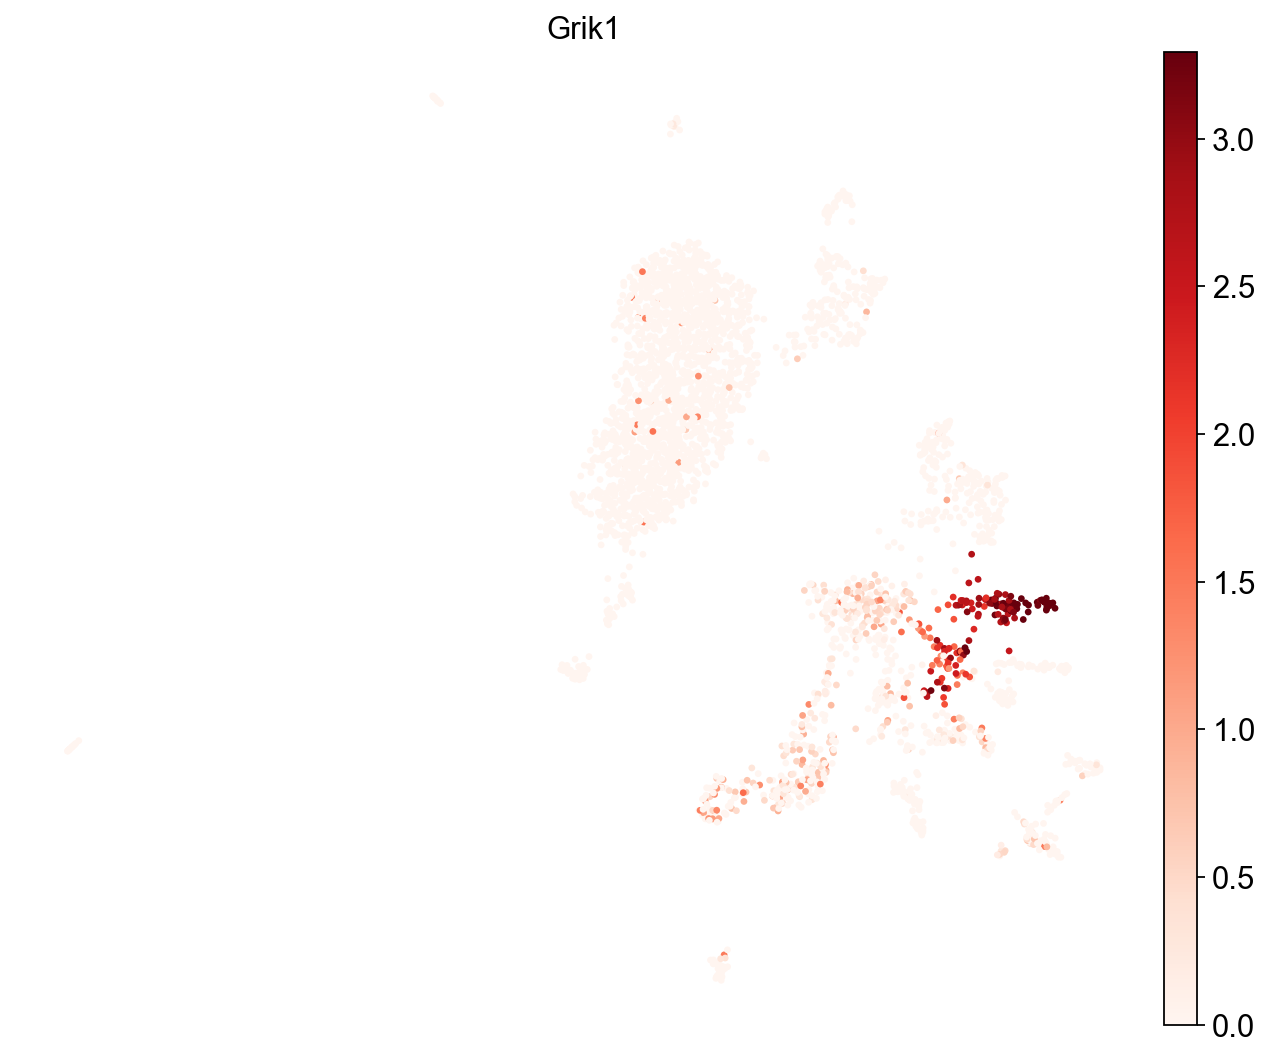




retinal ganglion cells:


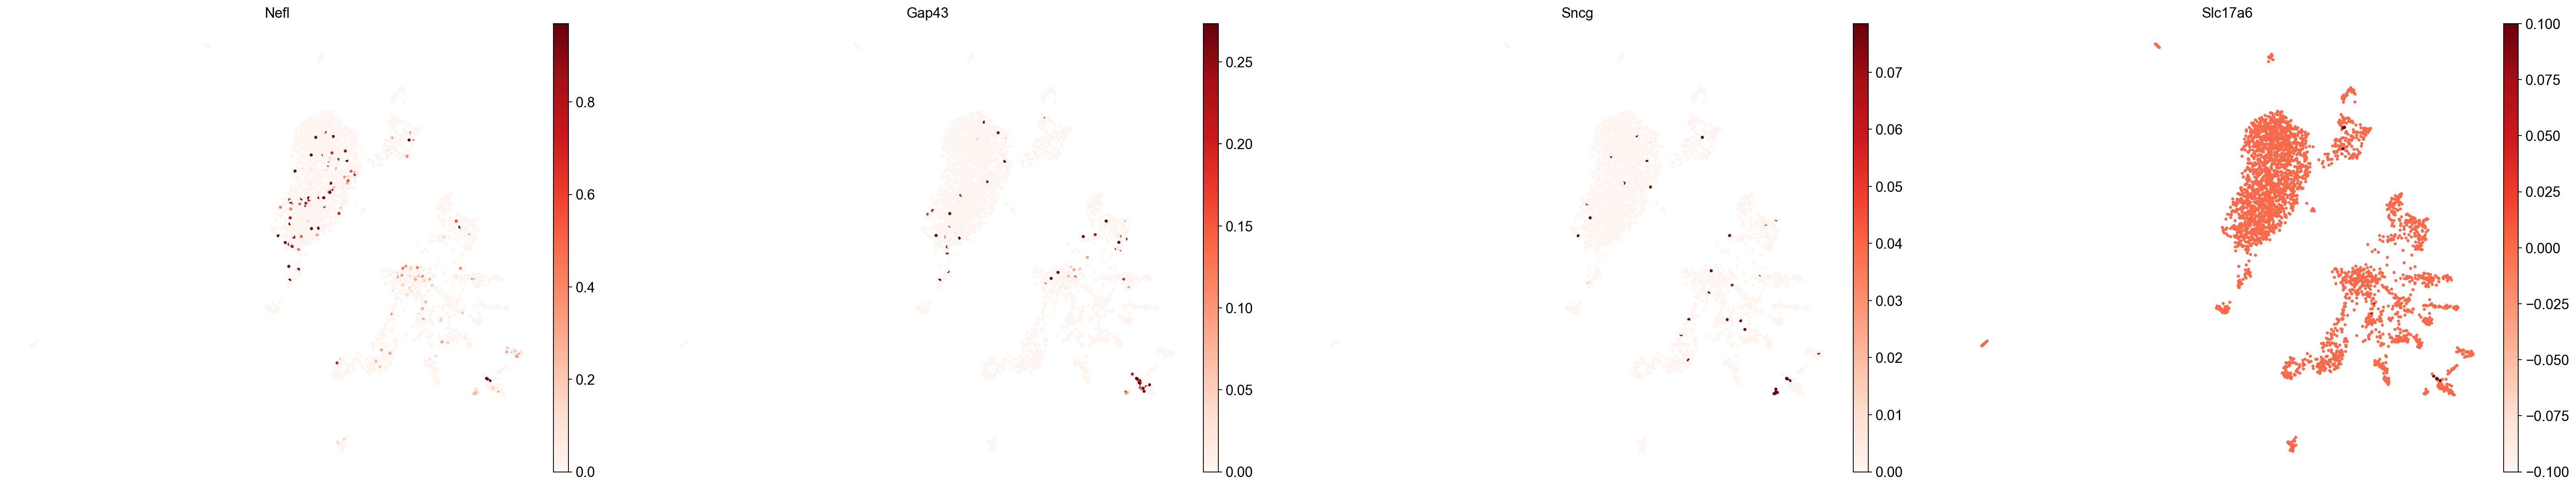




amacrine cells:


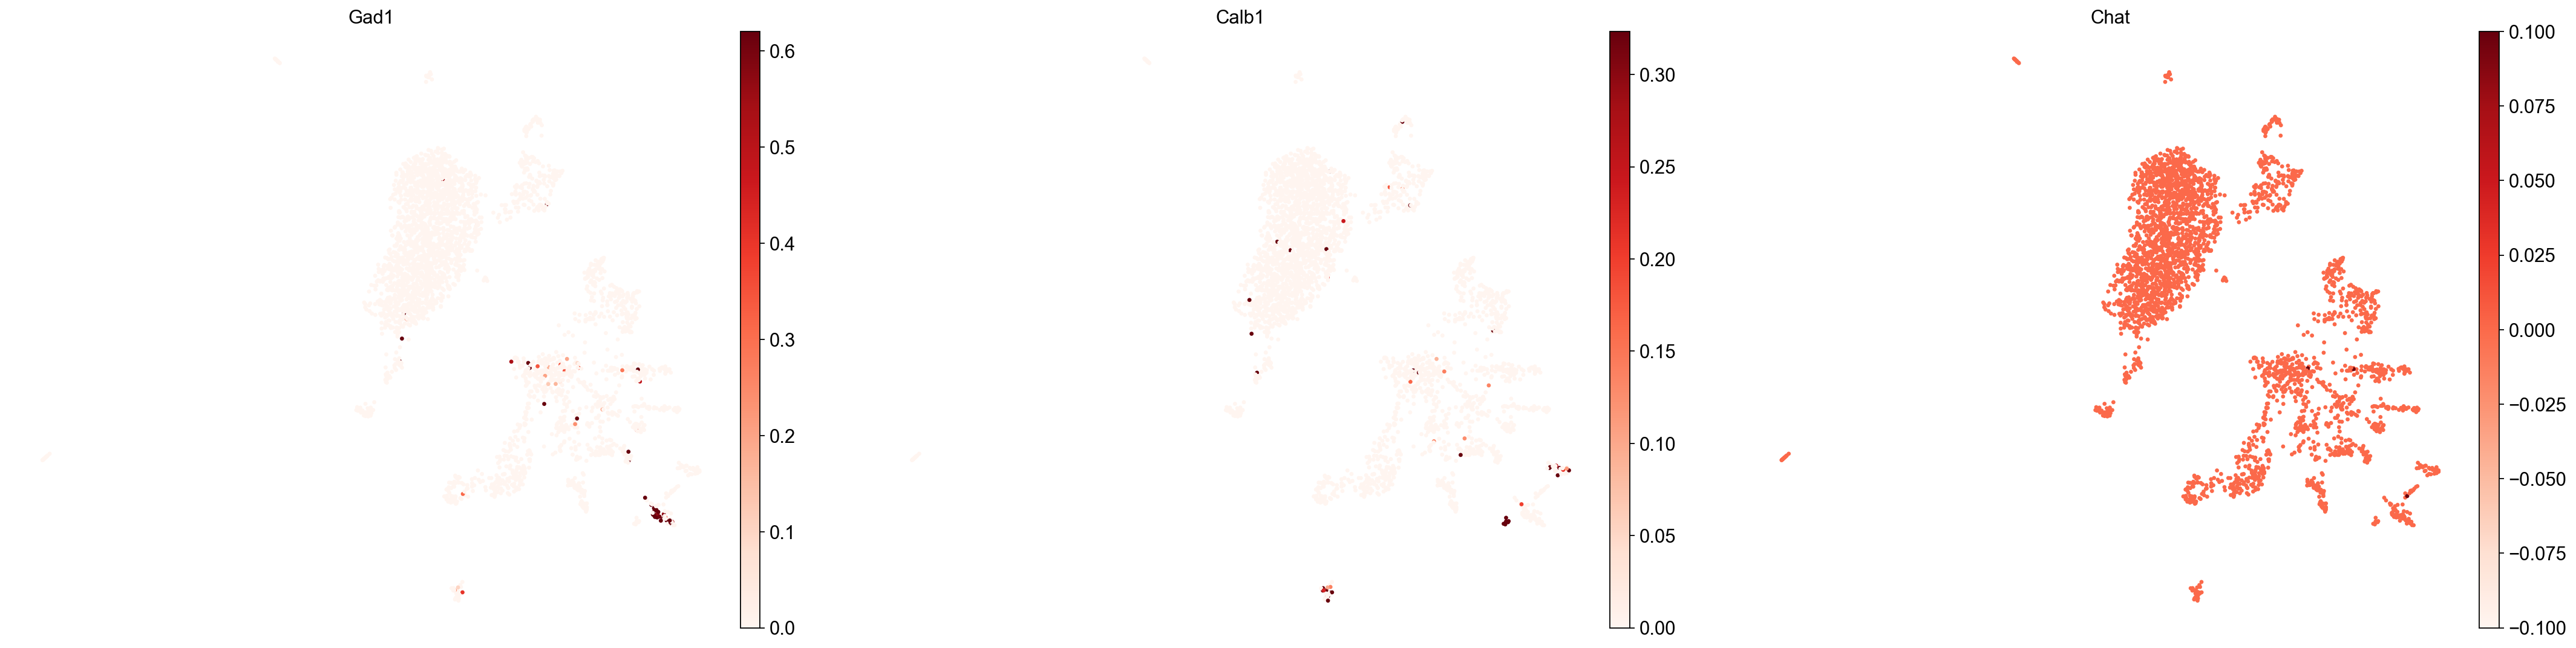




horizontal cells:


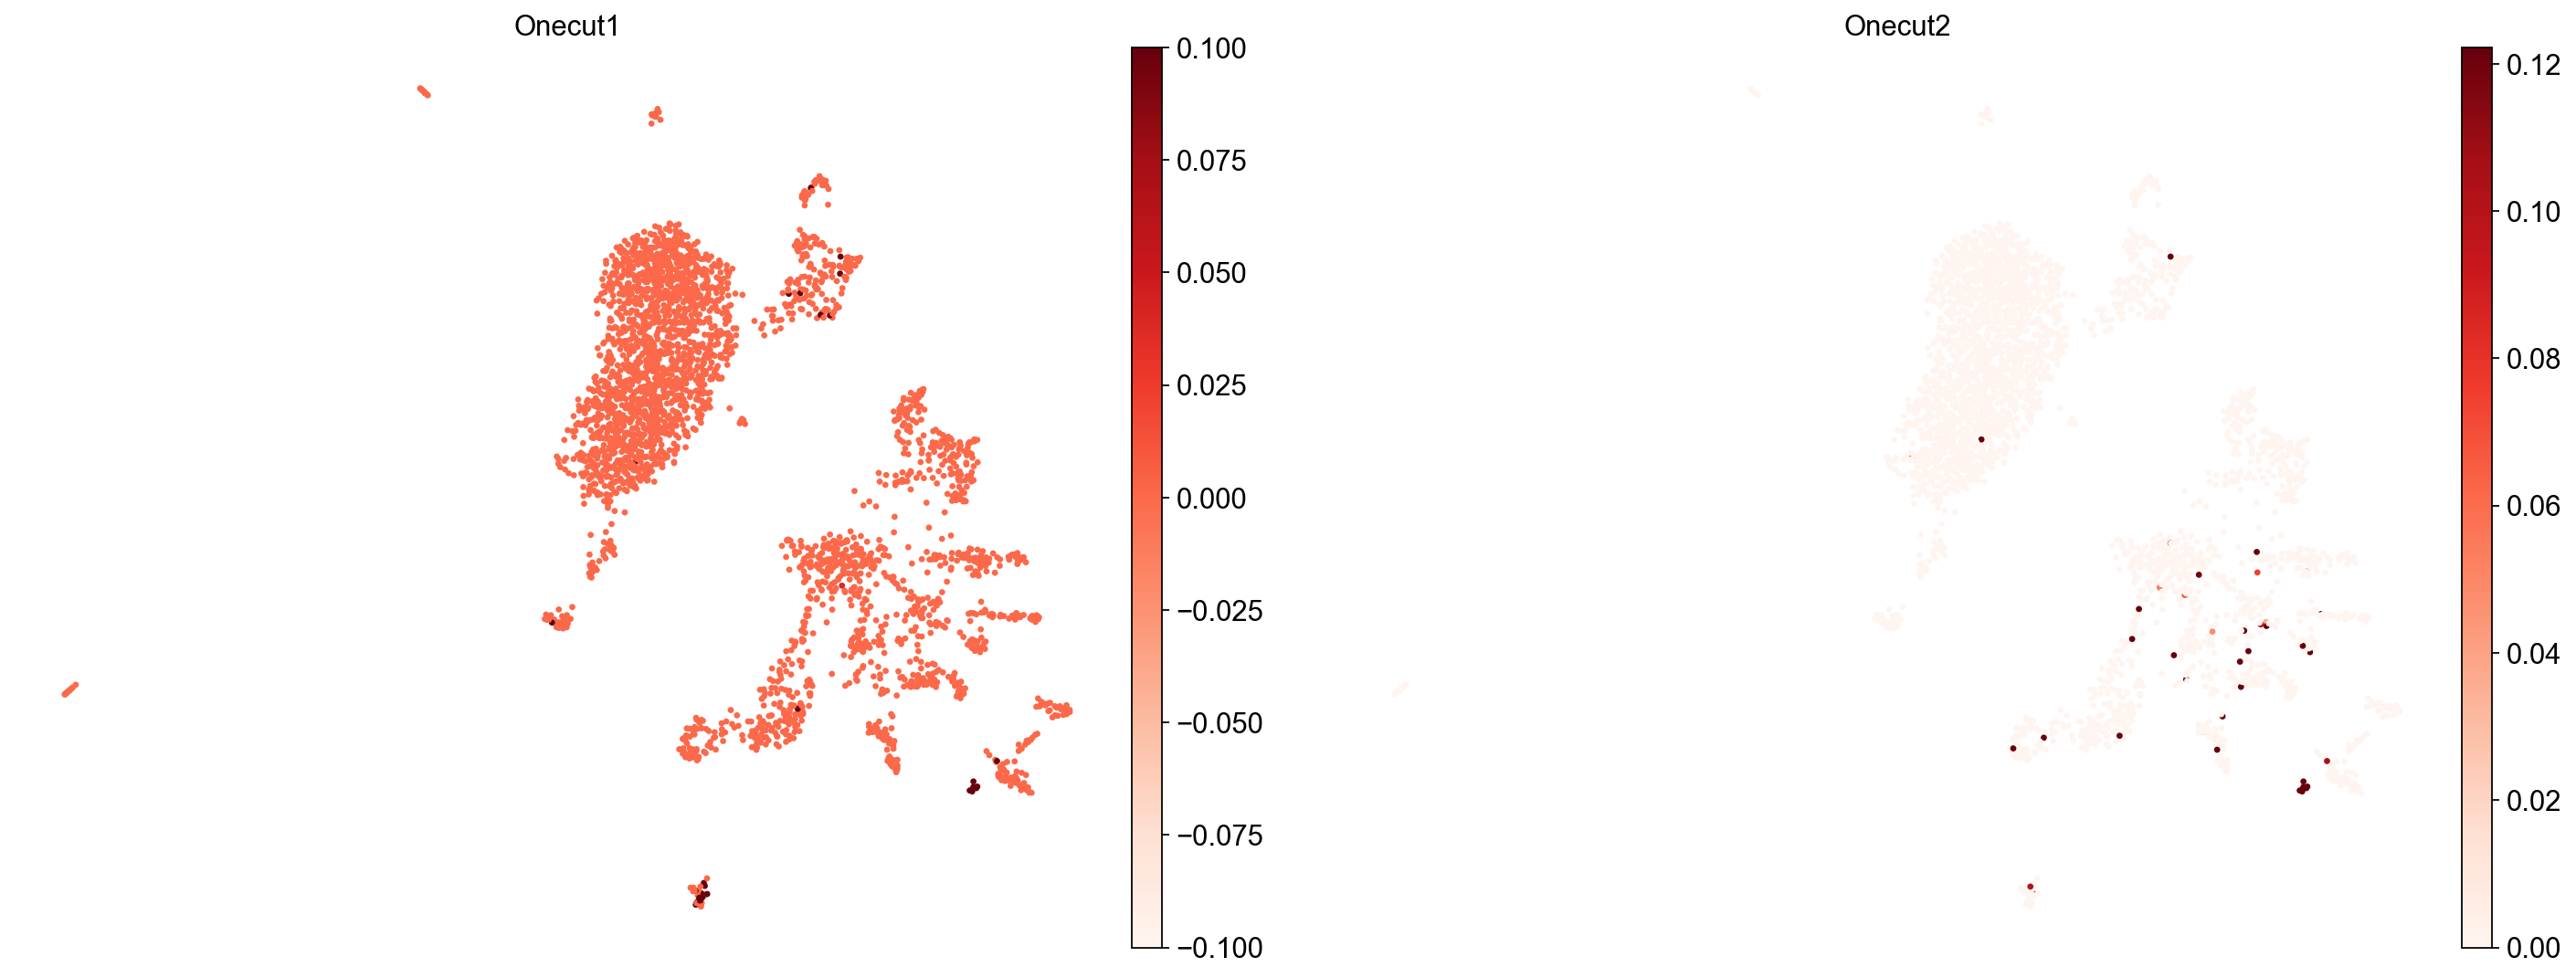

In [377]:
# plotting the expression of the marker genes for each celltype
for ct in marker_genes_in_data.keys():
    print(ct + ':')  # print cell subtype name
    sc.pl.umap(
        adata, 
        color = marker_genes_in_data[ct],
        vmin = 0,
        vmax = "p99", # set vmax to the 99th percentile of the gene count instead of the maximum, 
        # to prevent outliers from making expression in other cells invisible. 
        # Note that this can cause problems for extremely lowly expressed genes.

        sort_order=False,  # do not plot highest expression on top, to not get a biased view of the mean expression among cells
        frameon = False,
        cmap = "Reds"
    )
    print("\n\n")

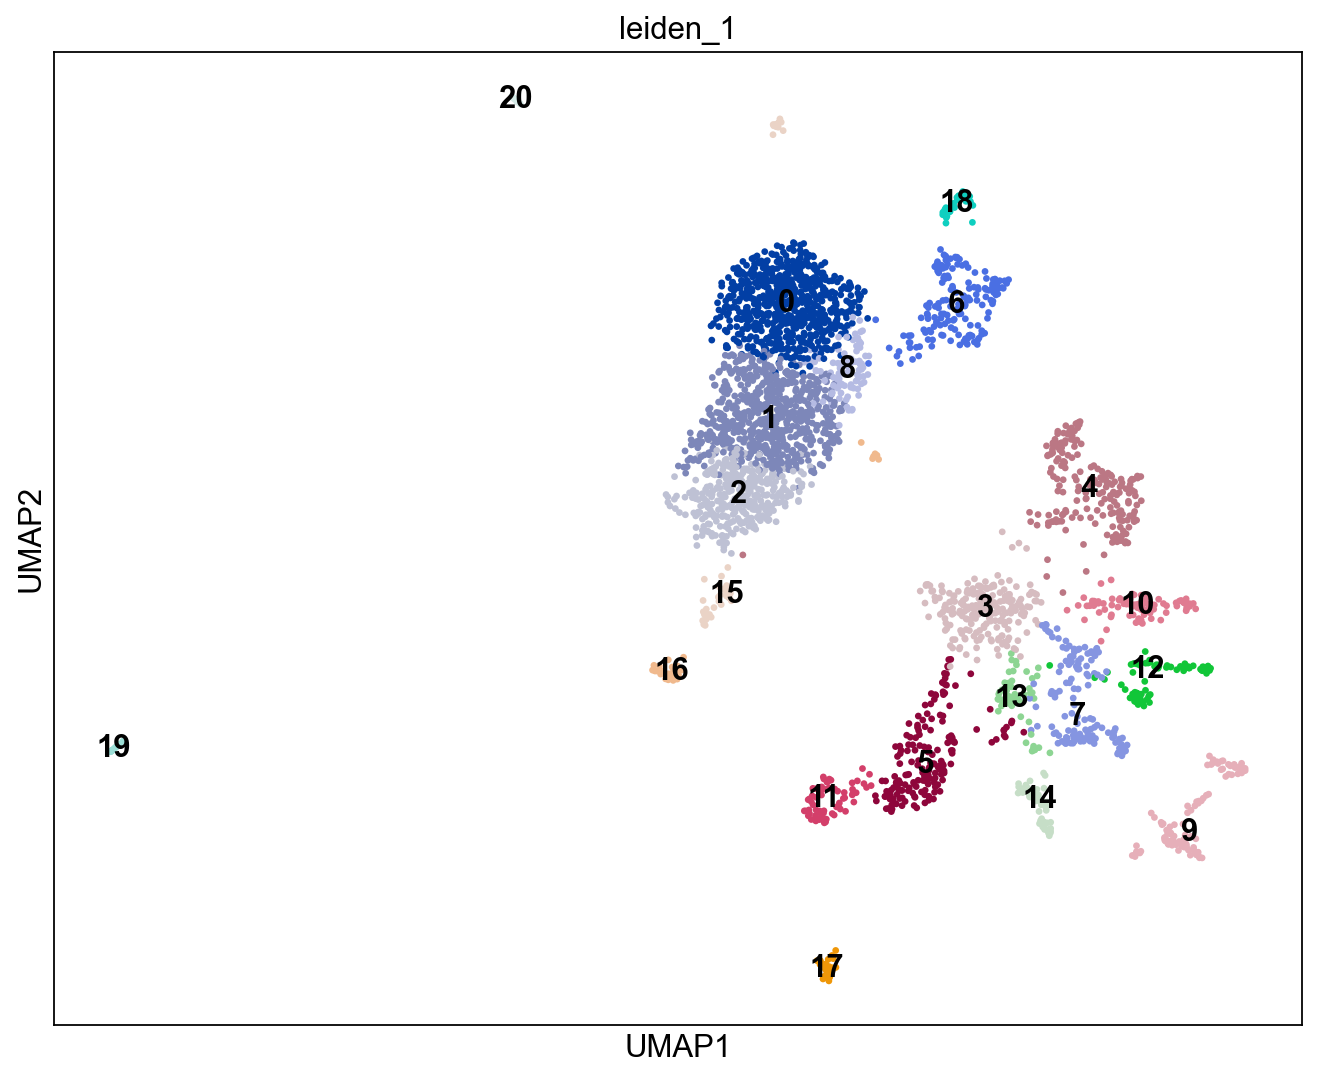

In [372]:
# actual clustering using which we will annotate the clusters into celltypes
sc.tl.leiden(adata, resolution=1, key_added="leiden_1")
sc.pl.umap(adata, color="leiden_1", legend_loc="on data")

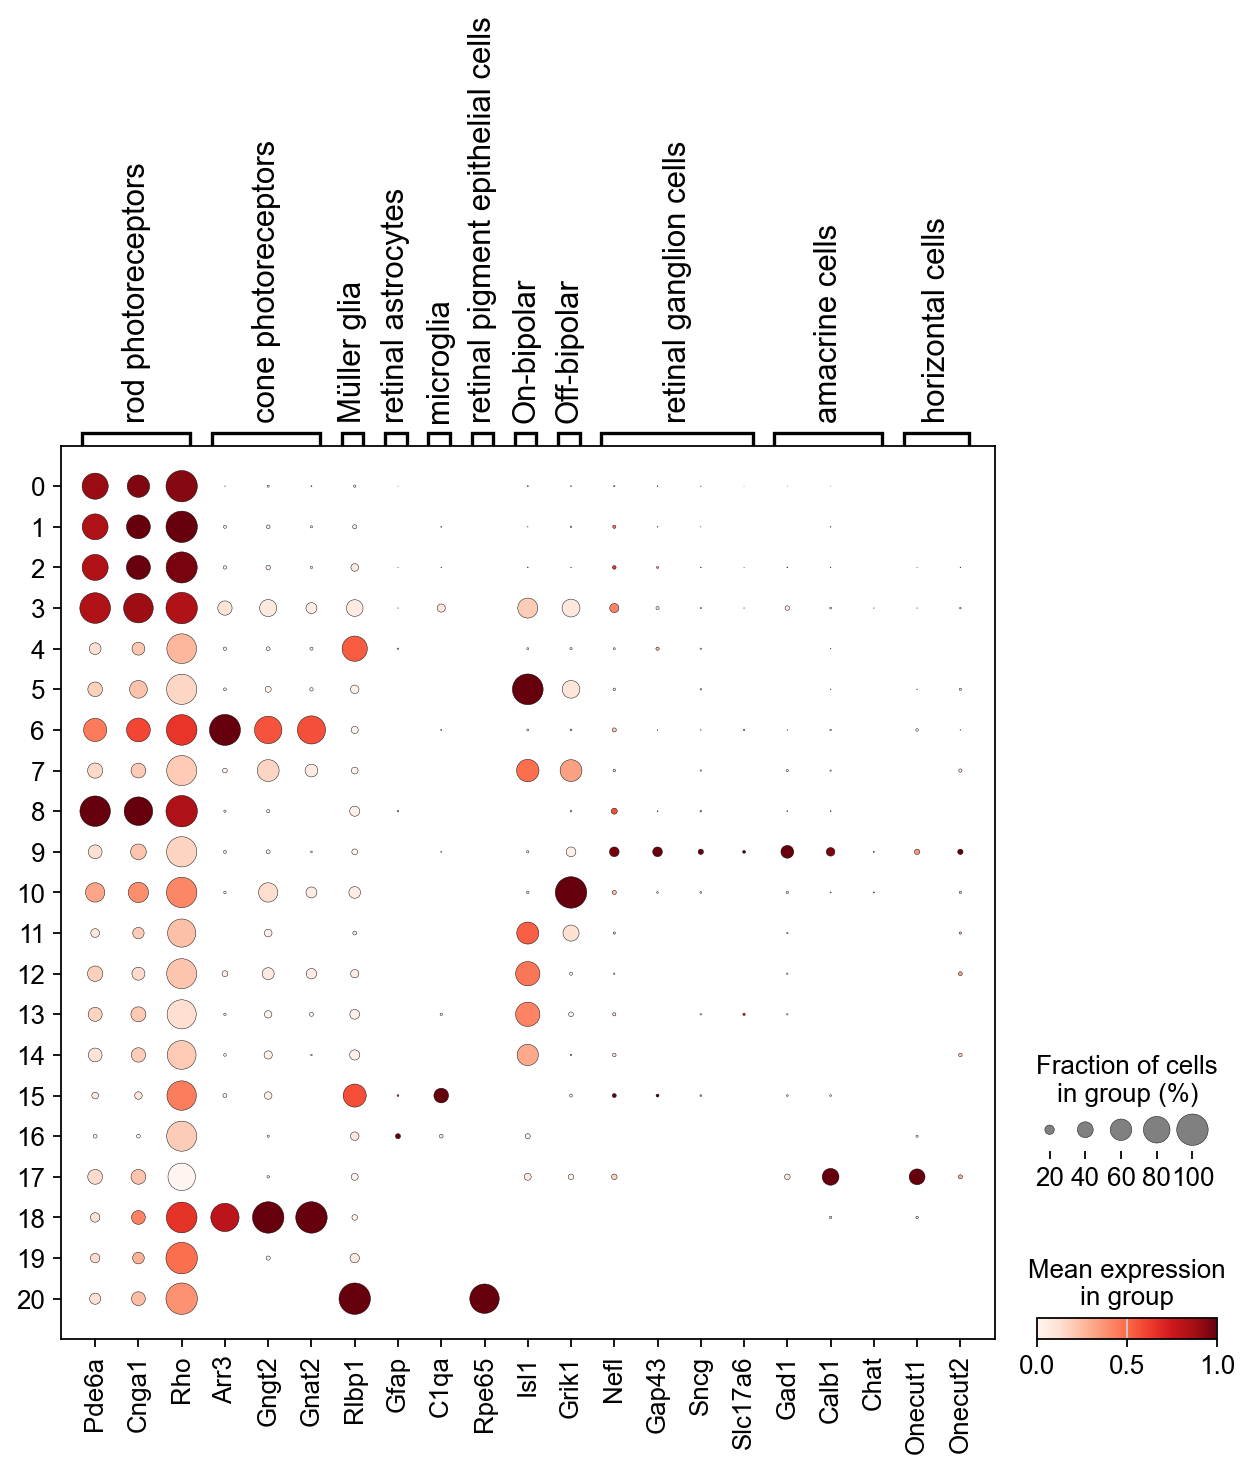

In [373]:
# visualizing the expression of the marker genes for our celltypes in the different clusters in dotplot
sc.pl.dotplot(
    adata,
    groupby="leiden_1",
    var_names=marker_genes_in_data,
    standard_scale="var",  # standard scale: normalize each gene to range from 0 to 1
)

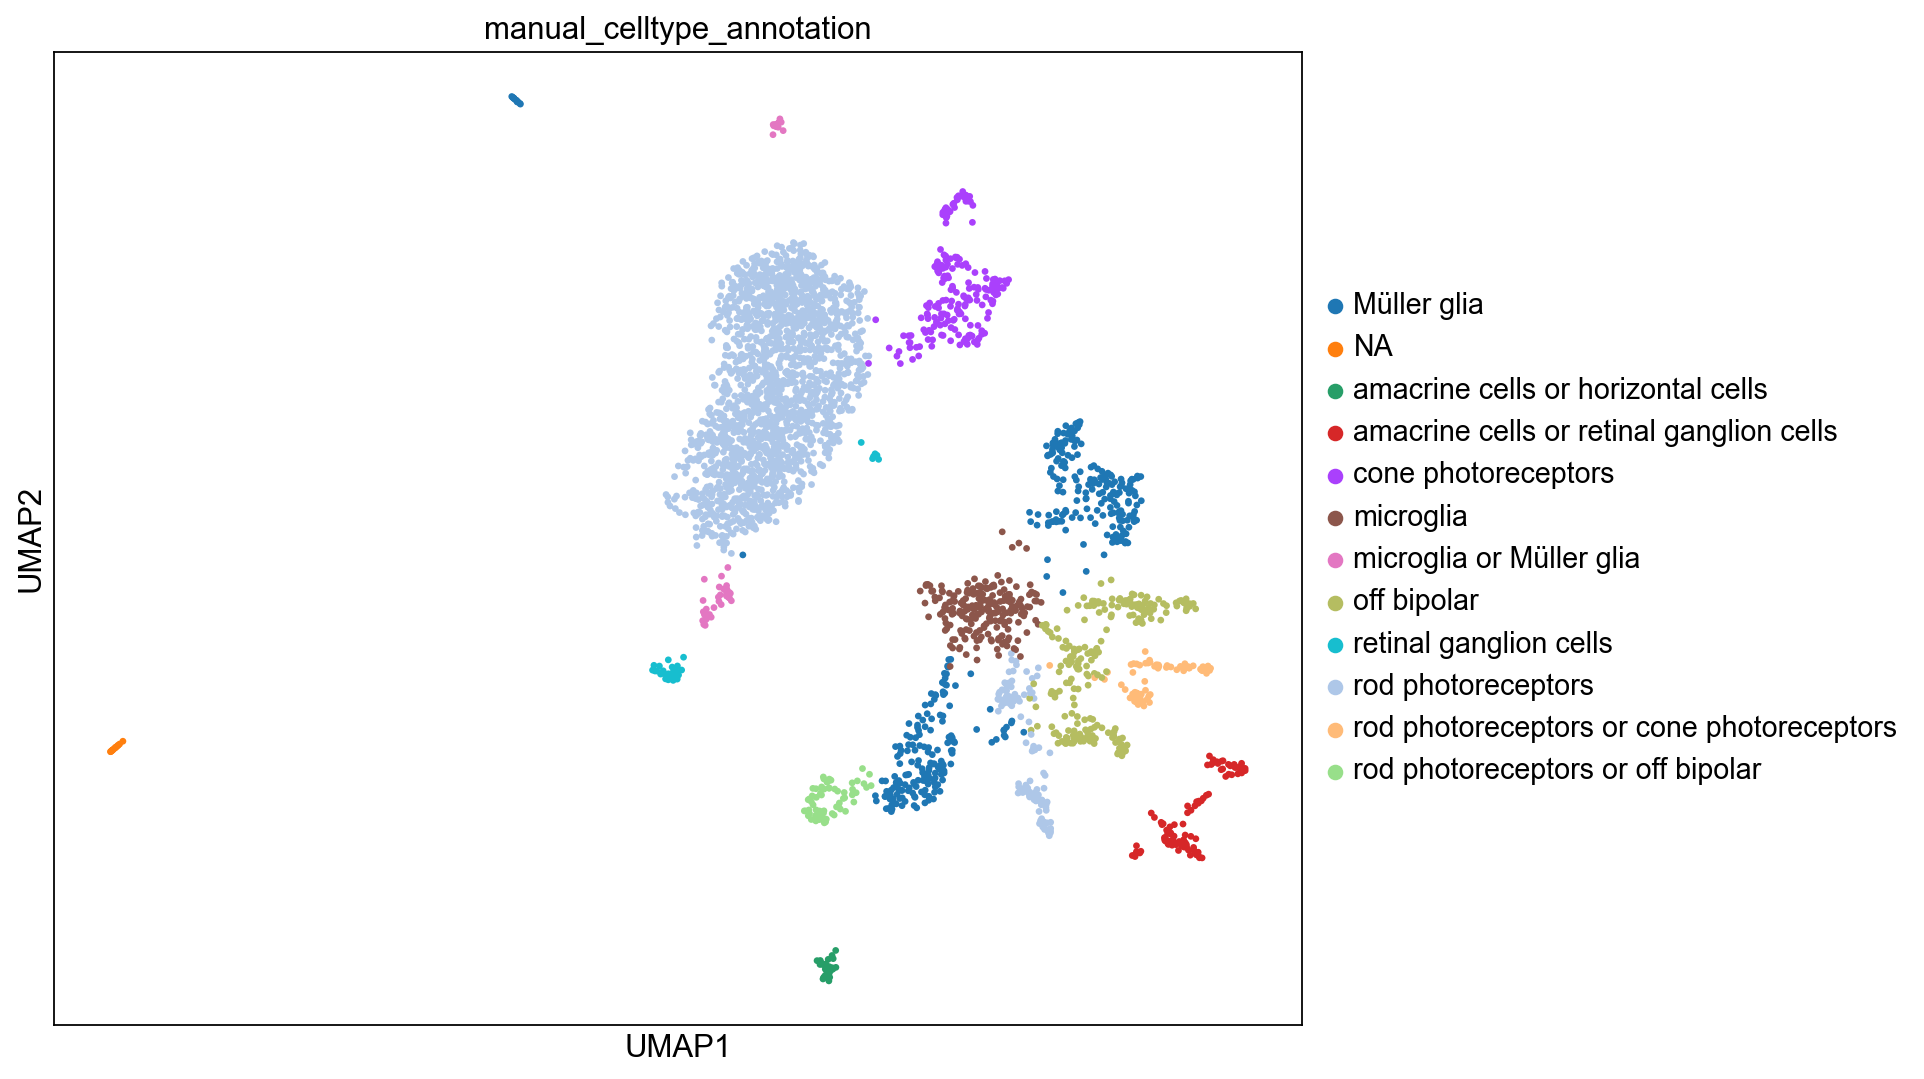

In [357]:
# finally doing the cluster annotation
cl_annotation = {
    "0": "rod photoreceptors",
    "1": "rod photoreceptors",
    "2": "rod photoreceptors",
    "3": "microglia",
    "4": "Müller glia",
    "5": "Müller glia",
    "6": "cone photoreceptors",
    "7": "off bipolar",
    "8": "rod photoreceptors",
    "9": "amacrine cells or retinal ganglion cells",
    "10": "off bipolar",
    "11": "rod photoreceptors or off bipolar",
    "12": "rod photoreceptors or cone photoreceptors",
    "13": "rod photoreceptors",
    "14": "rod photoreceptors",
    "15": "microglia or Müller glia",
    "16": "retinal ganglion cells",
    "17": "amacrine cells or horizontal cells",
    "18": "cone photoreceptors",
    "19": "NA",
    "20": "Müller glia"  
}

# lets visualization the annotations
adata.obs["manual_celltype_annotation"] = adata.obs.leiden_1.map(cl_annotation)
sc.pl.umap(adata, color=["manual_celltype_annotation"])

In [ ]:
# now do AAV-celltype identification using the scripts on the github. For that,
# need to first understand them as only then will I be able to do that same thing for mouse

### Other stuff

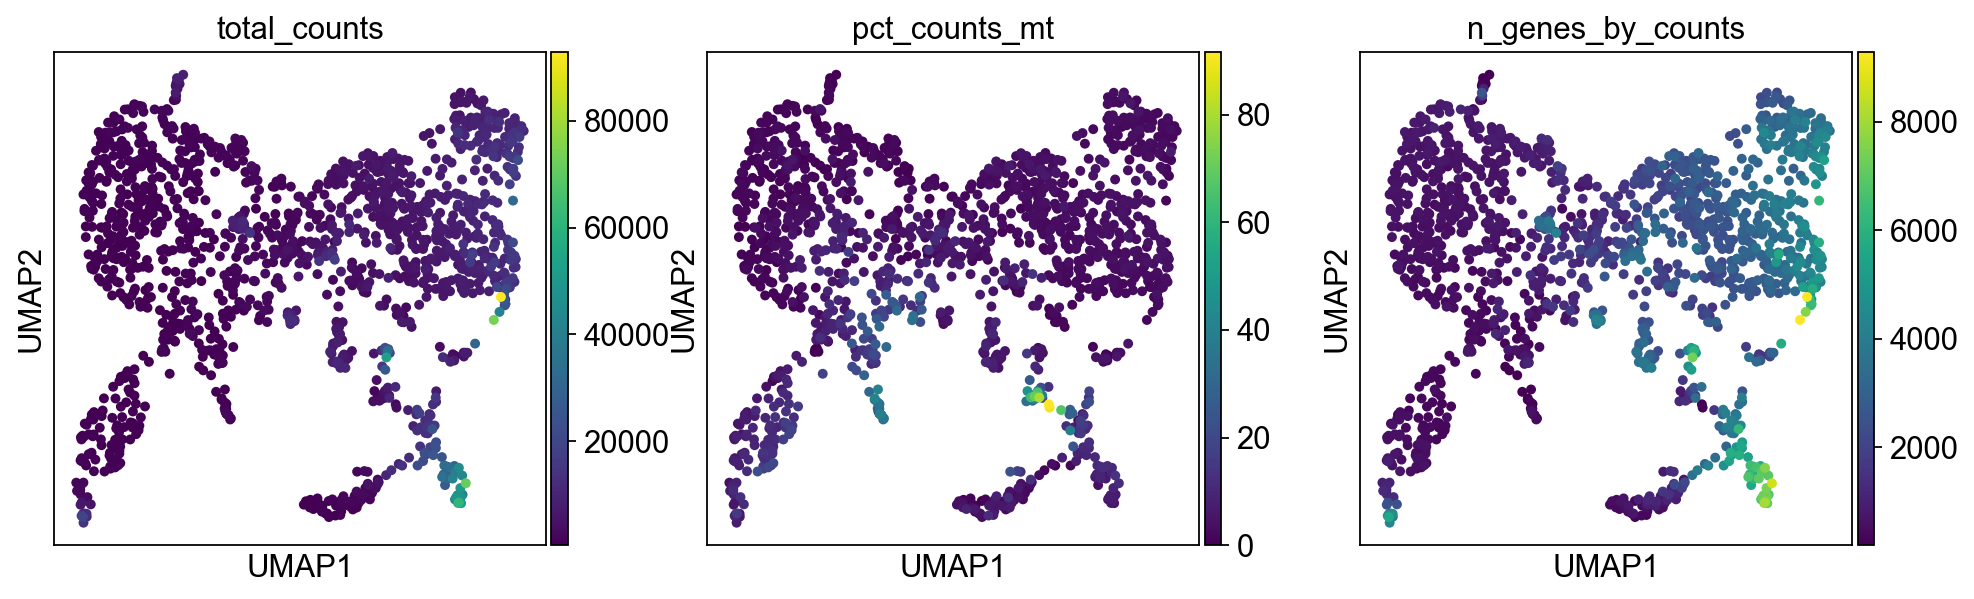

In [102]:
# calculate neighborhood graph on the data
sc.pp.neighbors(adata_rpe1)
sc.tl.umap(adata_rpe1)
# sc.pl.umap(adata_rpe1, color=["Malat1"])
sc.pl.umap(adata_rpe1, color=["total_counts", "pct_counts_mt", "n_genes_by_counts"])

In [100]:
# rod photoreceptors (PDE6A, CNGA1, RHO), cone photoreceptors (ARR3, GNGT2, GUCA1C), Müller glia 
# (RLBP1/CRALBP), retinal astrocytes (GFAP), microglia (HLA‐DPA1, HLA‐DPB1, HLA‐DRA), bipolar cells 
# (VSX2, OTX2), retinal ganglion cells (NEFL, GAP43, SNCG), amacrine cells (GAD1, CALB1, CHAT), 
# and horizontal cells (ONECUT1, ONECUT2)



adata_ret2.var[adata_ret2.var_names.str.contains('Onecut1')]

gene_ids    feature_types  genome     mt   ribo     hb  \
Onecut1  ENSMUSG00000043013  Gene Expression  GRCm39  False  False  False   

         n_cells_by_counts  mean_counts  log1p_mean_counts  \
Onecut1                106     0.051711           0.050419   

         pct_dropout_by_counts  total_counts  log1p_total_counts  n_cells  
Onecut1              98.006769         275.0            5.620401      106

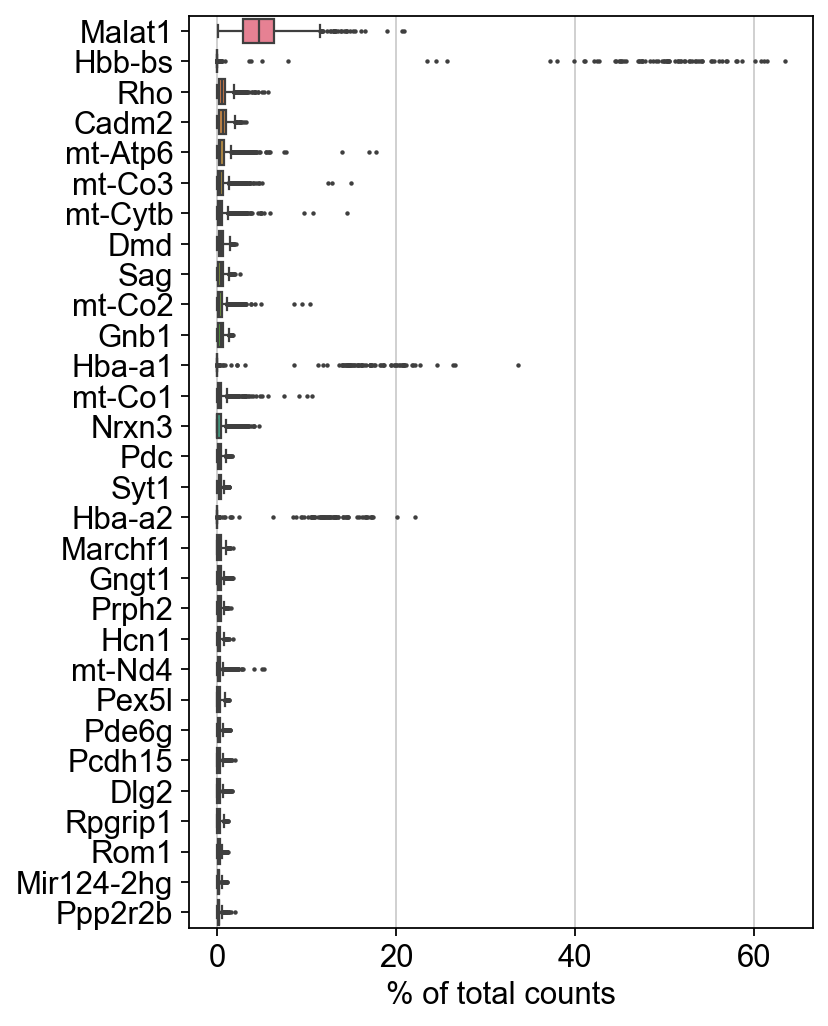

In [6]:
sc.pl.highest_expr_genes(adata)

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

In [8]:
adata

AnnData object with n_obs × n_vars = 3254 × 18973
    obs: 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells'

In [9]:
sc.tl.pca(adata, svd_solver="arpack")

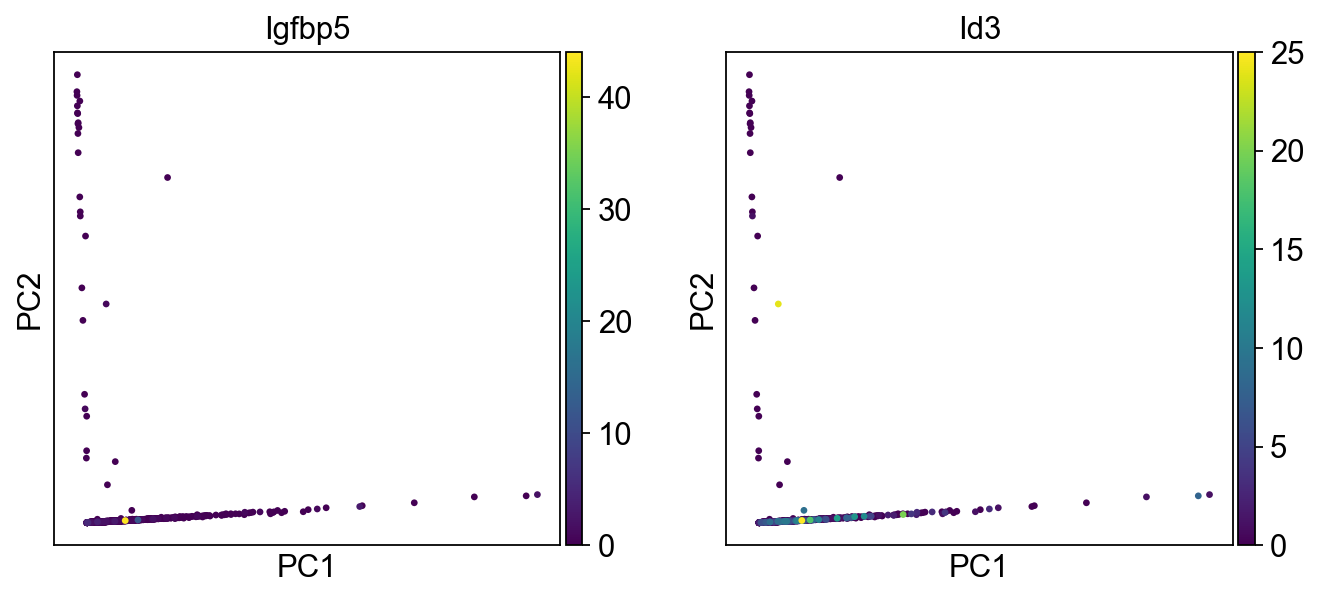

In [10]:
# sc.pl.pca(adata, color=["IGFBP5, ID3"])
sc.pl.pca(adata, color=["Igfbp5", "Id3"])

In [11]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)

In [12]:
sc.tl.umap(adata)

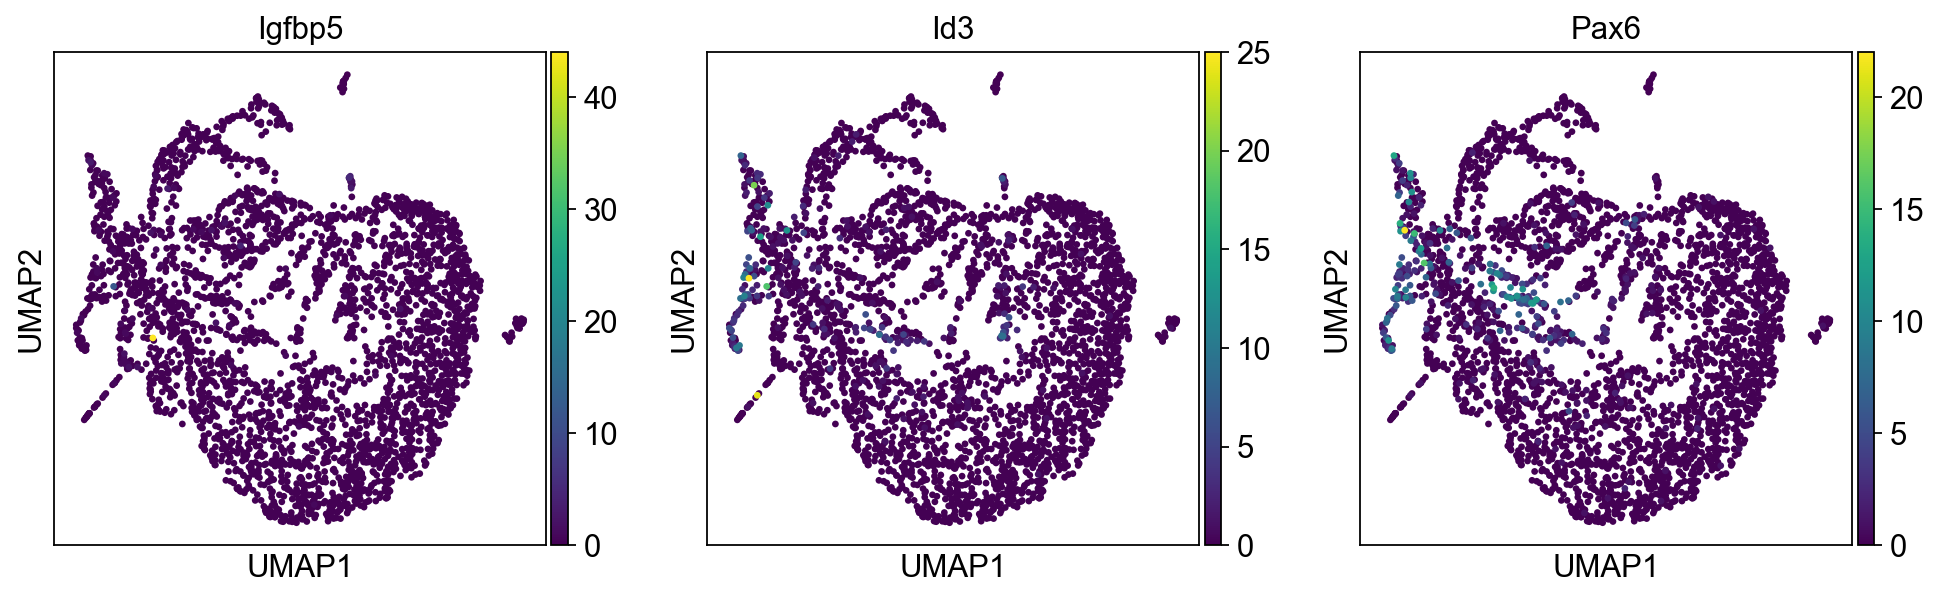

In [17]:
sc.pl.umap(adata, color=["Igfbp5", "Id3", "Pax6"])